### Dependencies

In [1]:
import random
import time

import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn import linear_model, svm

rnd_seed_state = 1

### Configuration

In [2]:
    
def pre_config():
    plt.rcParams.update({'font.size': 20})
    random.seed(rnd_seed_state)
    %matplotlib inline
    

In [3]:
pre_config()

### Loading dataset

In [4]:
def load_dataset():
    df_etf = pd.read_csv('dataset/ETFs.csv', index_col=False)
    df_mf = pd.read_csv('dataset/Mutual Funds.csv', index_col=False)

    return df_etf, df_mf

In [5]:
df_etf, df_mf = load_dataset()

C:\Users\NVukobrat\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3254: DtypeWarning: Columns (20,22,23,119,121,123) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


### ETFs Visualization

In [6]:
def types(df):
    for c, t in zip(df, df.dtypes):
        if np.issubdtype(t, np.number):
            print("Num", c, t)
        else:
            print("Str", c, t)

In [7]:
types(df_etf)

Str fund_name object
Str fund_extended_name object
Str category object
Str fund_family object
Num net_assets float64
Num ytd_return float64
Num fund_yield float64
Str legal_type object
Str investment object
Str size object
Str currency object
Num net_annual_expense_ratio_fund float64
Num net_annual_expense_ratio_category float64
Num portfolio_stocks float64
Num portfolio_bonds float64
Num price_earnings float64
Num price_book float64
Num price_sales float64
Num price_cashflow float64
Num basic_materials float64
Num consumer_cyclical float64
Num financial_services float64
Num real_estate float64
Num consumer_defensive float64
Num healthcare float64
Num utilities float64
Num communication_services float64
Num energy float64
Num industrials float64
Num technology float64
Num rating_us_government float64
Num rating_aaa float64
Num rating_aa float64
Num rating_a float64
Num rating_bbb float64
Num rating_bb float64
Num rating_b float64
Num rating_below_b float64
Num rating_others float64
Num

In [8]:
def describe(df):
    print("DataFrame summary:")
    print(df.info())
    print()

    print("Columns summary:")
    for col in list(df):
        print(col)
        print(df[col].dropna().describe())
        print(df[col].dropna().value_counts())
        print()
  

In [9]:
describe(df_etf)

DataFrame summary:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2352 entries, 0 to 2351
Columns: 104 entries, fund_name to category_treynor_ratio_10years
dtypes: float64(94), object(10)
memory usage: 1.9+ MB
None

Columns summary:
fund_name
count     2352
unique    2352
top       FLEU
freq         1
Name: fund_name, dtype: object
FLEU    1
XME     1
FLIY    1
SAA     1
SPSM    1
       ..
FLQE    1
GMOM    1
XAR     1
SQLV    1
VNQ     1
Name: fund_name, Length: 2352, dtype: int64

fund_extended_name
count                 2352
unique                2340
top       SPDR S&P 500 ETF
freq                     2
Name: fund_extended_name, dtype: object
SPDR S&P 500 ETF                   2
iShares JPX-Nikkei 400 ETF         2
iShares MSCI Kokusai ETF           2
iShares S&P 100 ETF                2
iShares Core High Dividend ETF     2
                                  ..
UBS ETF EURO STOXX 50 EUR A dis    1
iShares Silver Trust               1
iShares Europe ETF                 1
SPDR SSg

count    2348.000000
mean        2.259919
std         4.405158
min         0.000000
25%         0.000000
50%         0.000000
75%         3.560000
max        99.370000
Name: communication_services, dtype: float64
0.00     1221
3.56       10
3.57        9
1.13        7
1.26        6
         ... 
12.11       1
4.58        1
9.53        1
1.39        1
1.71        1
Name: communication_services, Length: 634, dtype: int64

energy
count    2348.000000
mean        4.991648
std        13.748538
min         0.000000
25%         0.000000
50%         0.000000
75%         5.285000
max       100.000000
Name: energy, dtype: float64
0.00      1195
100.00      16
5.43         7
7.34         7
1.77         6
          ... 
4.58         1
10.80        1
0.81         1
0.31         1
21.88        1
Name: energy, Length: 764, dtype: int64

industrials
count    2348.000000
mean        7.816440
std        12.503796
min         0.000000
25%         0.000000
50%         3.780000
75%        12.185000
max    

Name: category_alpha_3years, dtype: float64
-0.65    114
 0.43     81
-1.88     69
-2.82     62
 0.72     52
        ... 
 1.73      3
 1.42      3
-0.35      1
-0.07      1
 1.75      1
Name: category_alpha_3years, Length: 76, dtype: int64

fund_alpha_5years
count    2162.000000
mean       -0.759112
std         6.106187
min      -135.990000
25%        -1.070000
50%         0.000000
75%         0.350000
max        31.330000
Name: fund_alpha_5years, dtype: float64
 0.00     748
-0.08       7
-0.17       6
-0.21       6
 0.70       6
         ... 
 8.75       1
-14.75      1
-10.64      1
-19.08      1
-2.82       1
Name: fund_alpha_5years, Length: 898, dtype: int64

category_alpha_5years
count    1439.000000
mean        0.108416
std         4.516500
min       -18.320000
25%        -2.170000
50%         0.160000
75%         2.250000
max        10.910000
Name: category_alpha_5years, dtype: float64
-0.48    114
 0.71     81
-4.30     69
 1.34     51
 5.86     48
        ... 
-5.26      3
-

In [10]:
def hist_bar_plot(df, rc_num=(2, 6), size=(16 * 3, 9 * 3), unique=True):
    # Chose adequate columns for visualization
    if unique:
        num_unique_col = df.nunique()
        df = df[[col for col in df if 1 < num_unique_col[col] < 50]]

    # Create Hist and Bar plots
    plt.figure(figsize=size)
    for i, col in enumerate(df):
        plt.subplot(rc_num[0], rc_num[1], i + 1)
        df_column = df[col]
        if np.issubdtype(type(df_column.iloc[0]), np.number):
            df_column.hist()
        else:
            df_column.value_counts().plot.bar()
        plt.title(col, fontsize=25)
        plt.xticks(rotation=30, fontsize=30)
        plt.yticks(fontsize=30)
        plt.ylabel('counts')

        if i == 10:
            break
    plt.tight_layout(pad=1.0, w_pad=1.0, h_pad=1.0)
    plt.show()

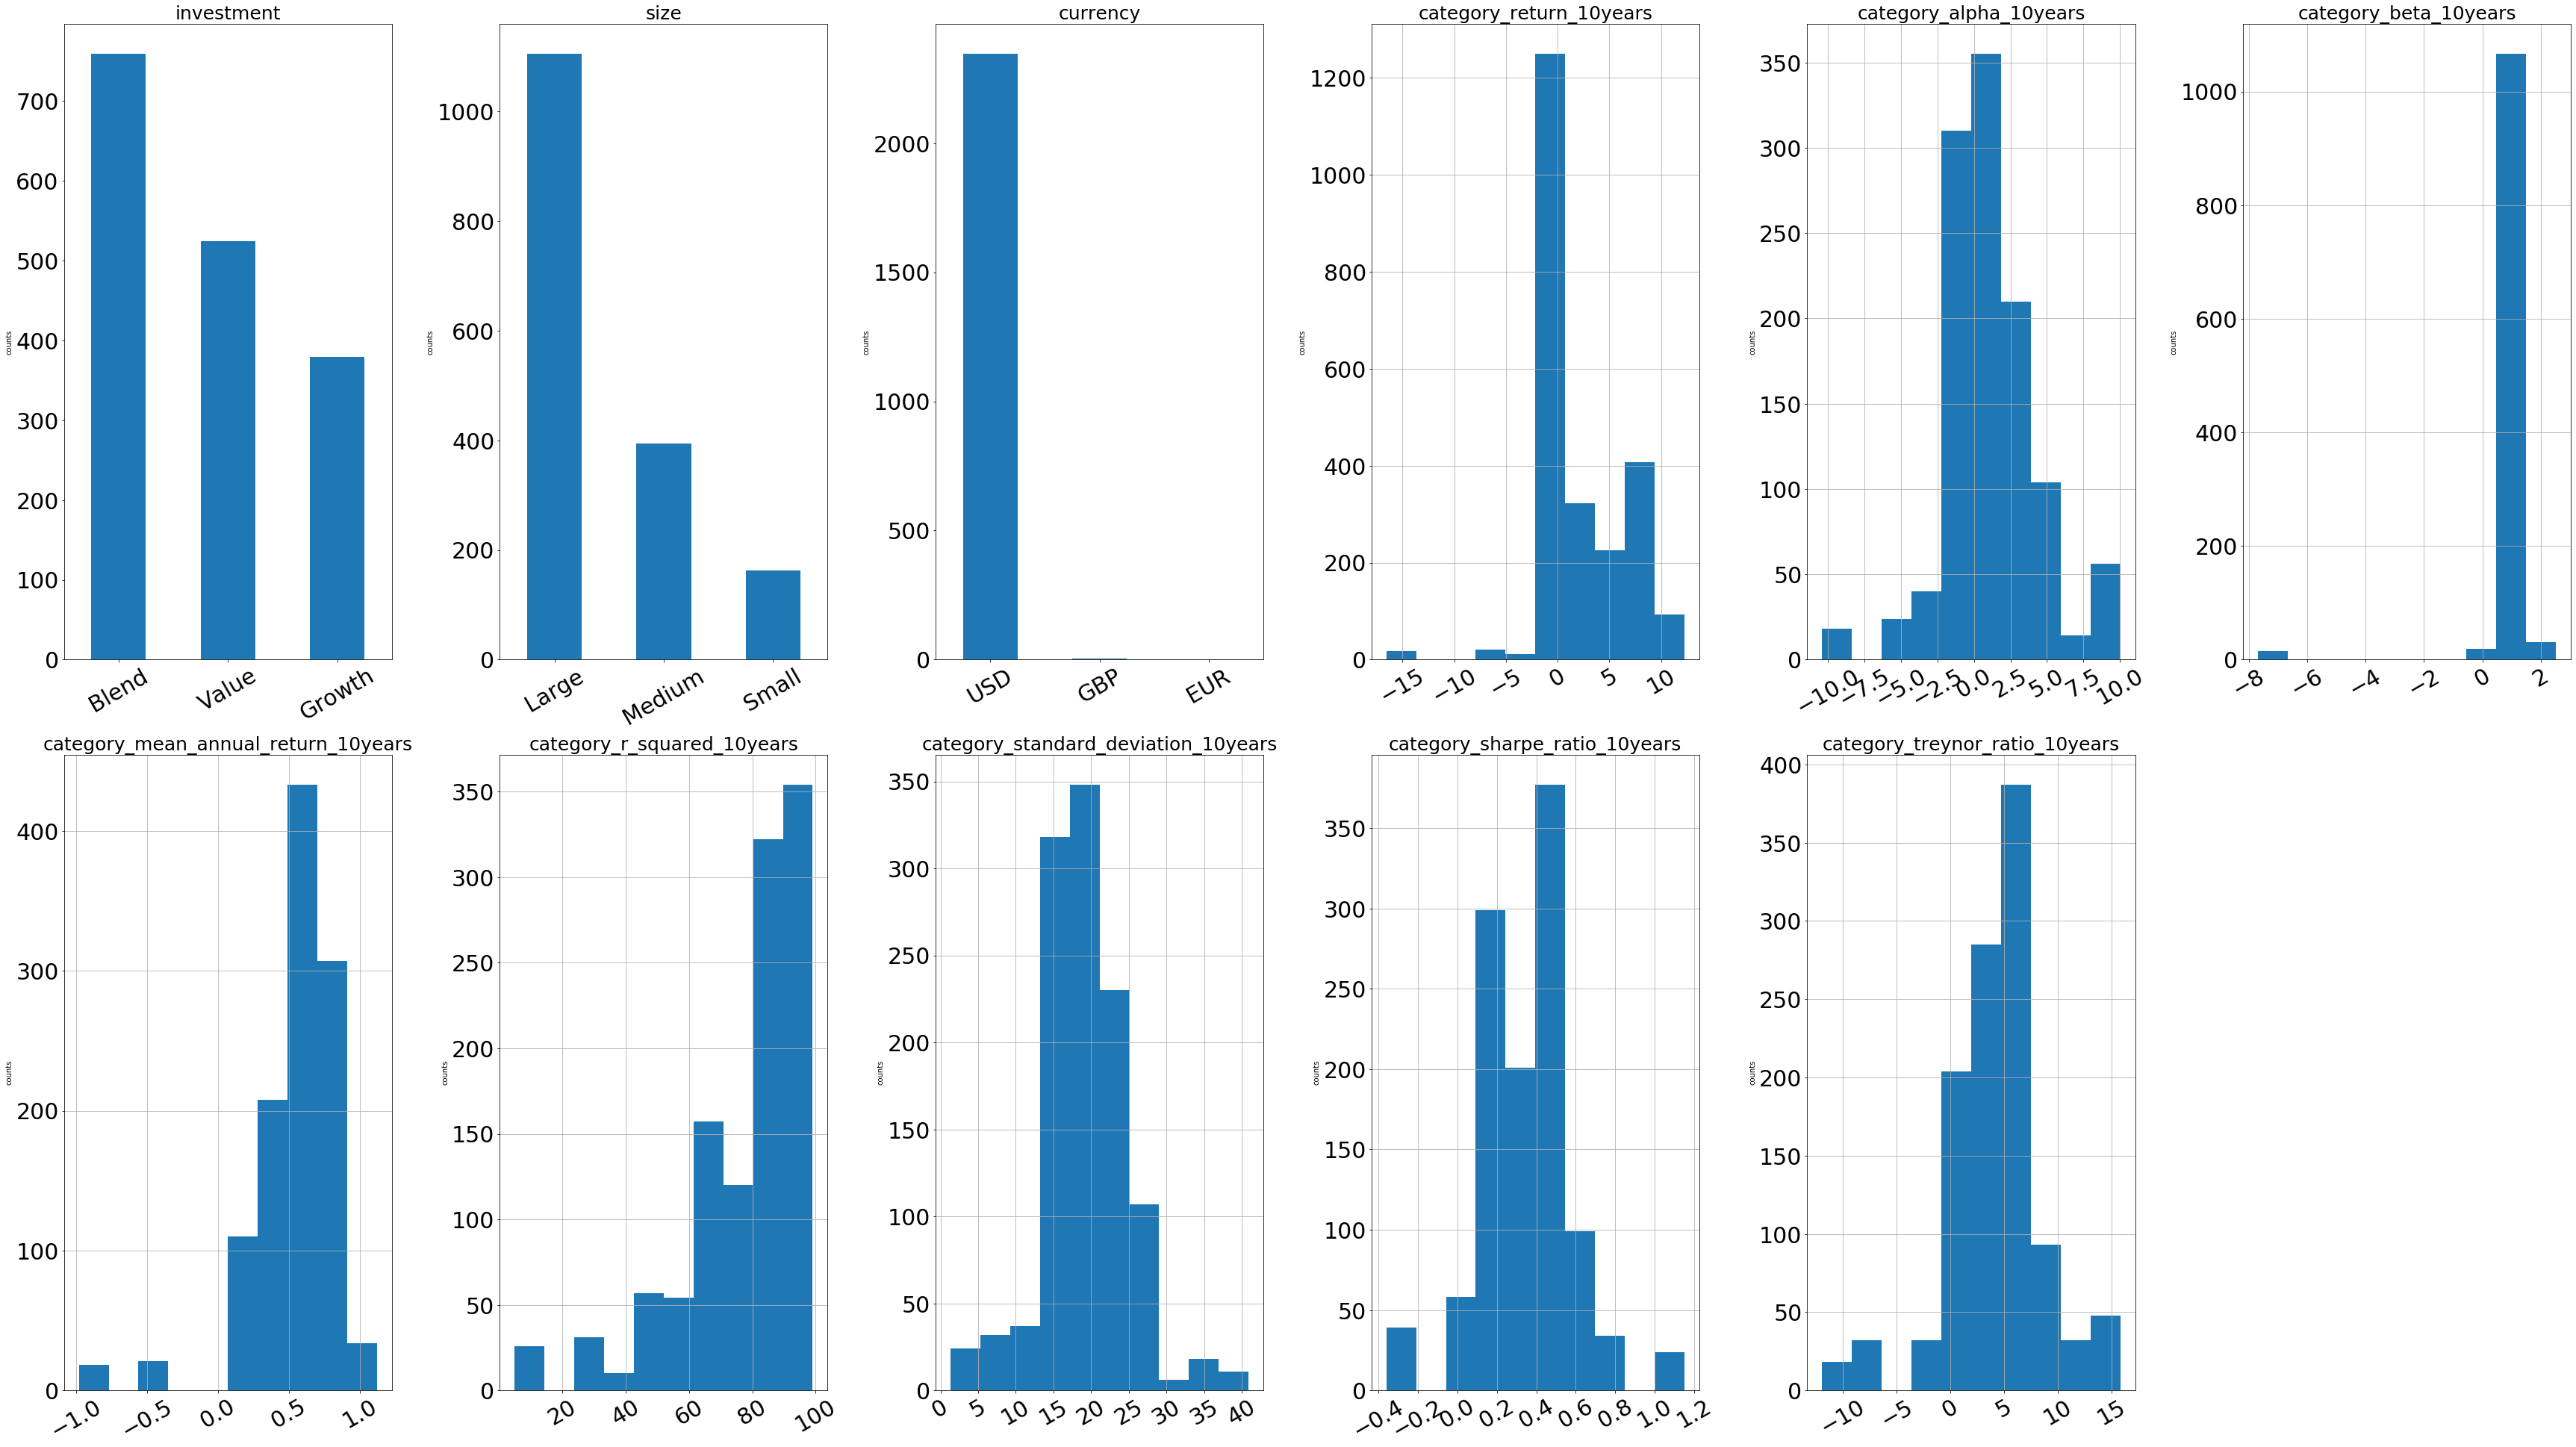

In [11]:
hist_bar_plot(df_etf)

In [12]:
def correlation_clean(df, threshold=(-0.9, -0.3, 0.3, 0.9)):
    # Fix for non-numerical (or too many nan) columns
    col_corr = {
        # ETFs
        'fund_name', 'fund_extended_name', 'category', 'fund_family', 'net_assets', 'legal_type', 'investment', 'size',
        'currency', 'rating_us_government', 'fund_treynor_ratio_3years', 'category_treynor_ratio_5years',
    }
    try:
        for col in col_corr:
            del df[col]
    except KeyError:
        pass  # legal_type

    # Chose numerical columns
    corr_matrix = df.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (not threshold[0] <= corr_matrix.iloc[i, j] <= threshold[1] and
                not threshold[2] <= corr_matrix.iloc[i, j] <= threshold[3]
            ) and (corr_matrix.columns[j] not in col_corr):
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
                if colname in df.columns:
                    del df[colname]

    return df

In [13]:
df_etf = correlation_clean(df_etf)

In [14]:
def corr_mtx(df, fig_size=50, unique=True):
    sns.set(font_scale=4.0)
    # Chose adequate columns for visualization
    if unique:
        num_unique_col = df.nunique()
        df = df[[col for col in df if num_unique_col[col] > 1]]

    f, ax = plt.subplots(figsize=(fig_size, fig_size))
    corr = df.corr()
    sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
                square=True, ax=ax)
    plt.show()
    sns.set(font_scale=2.0)
    

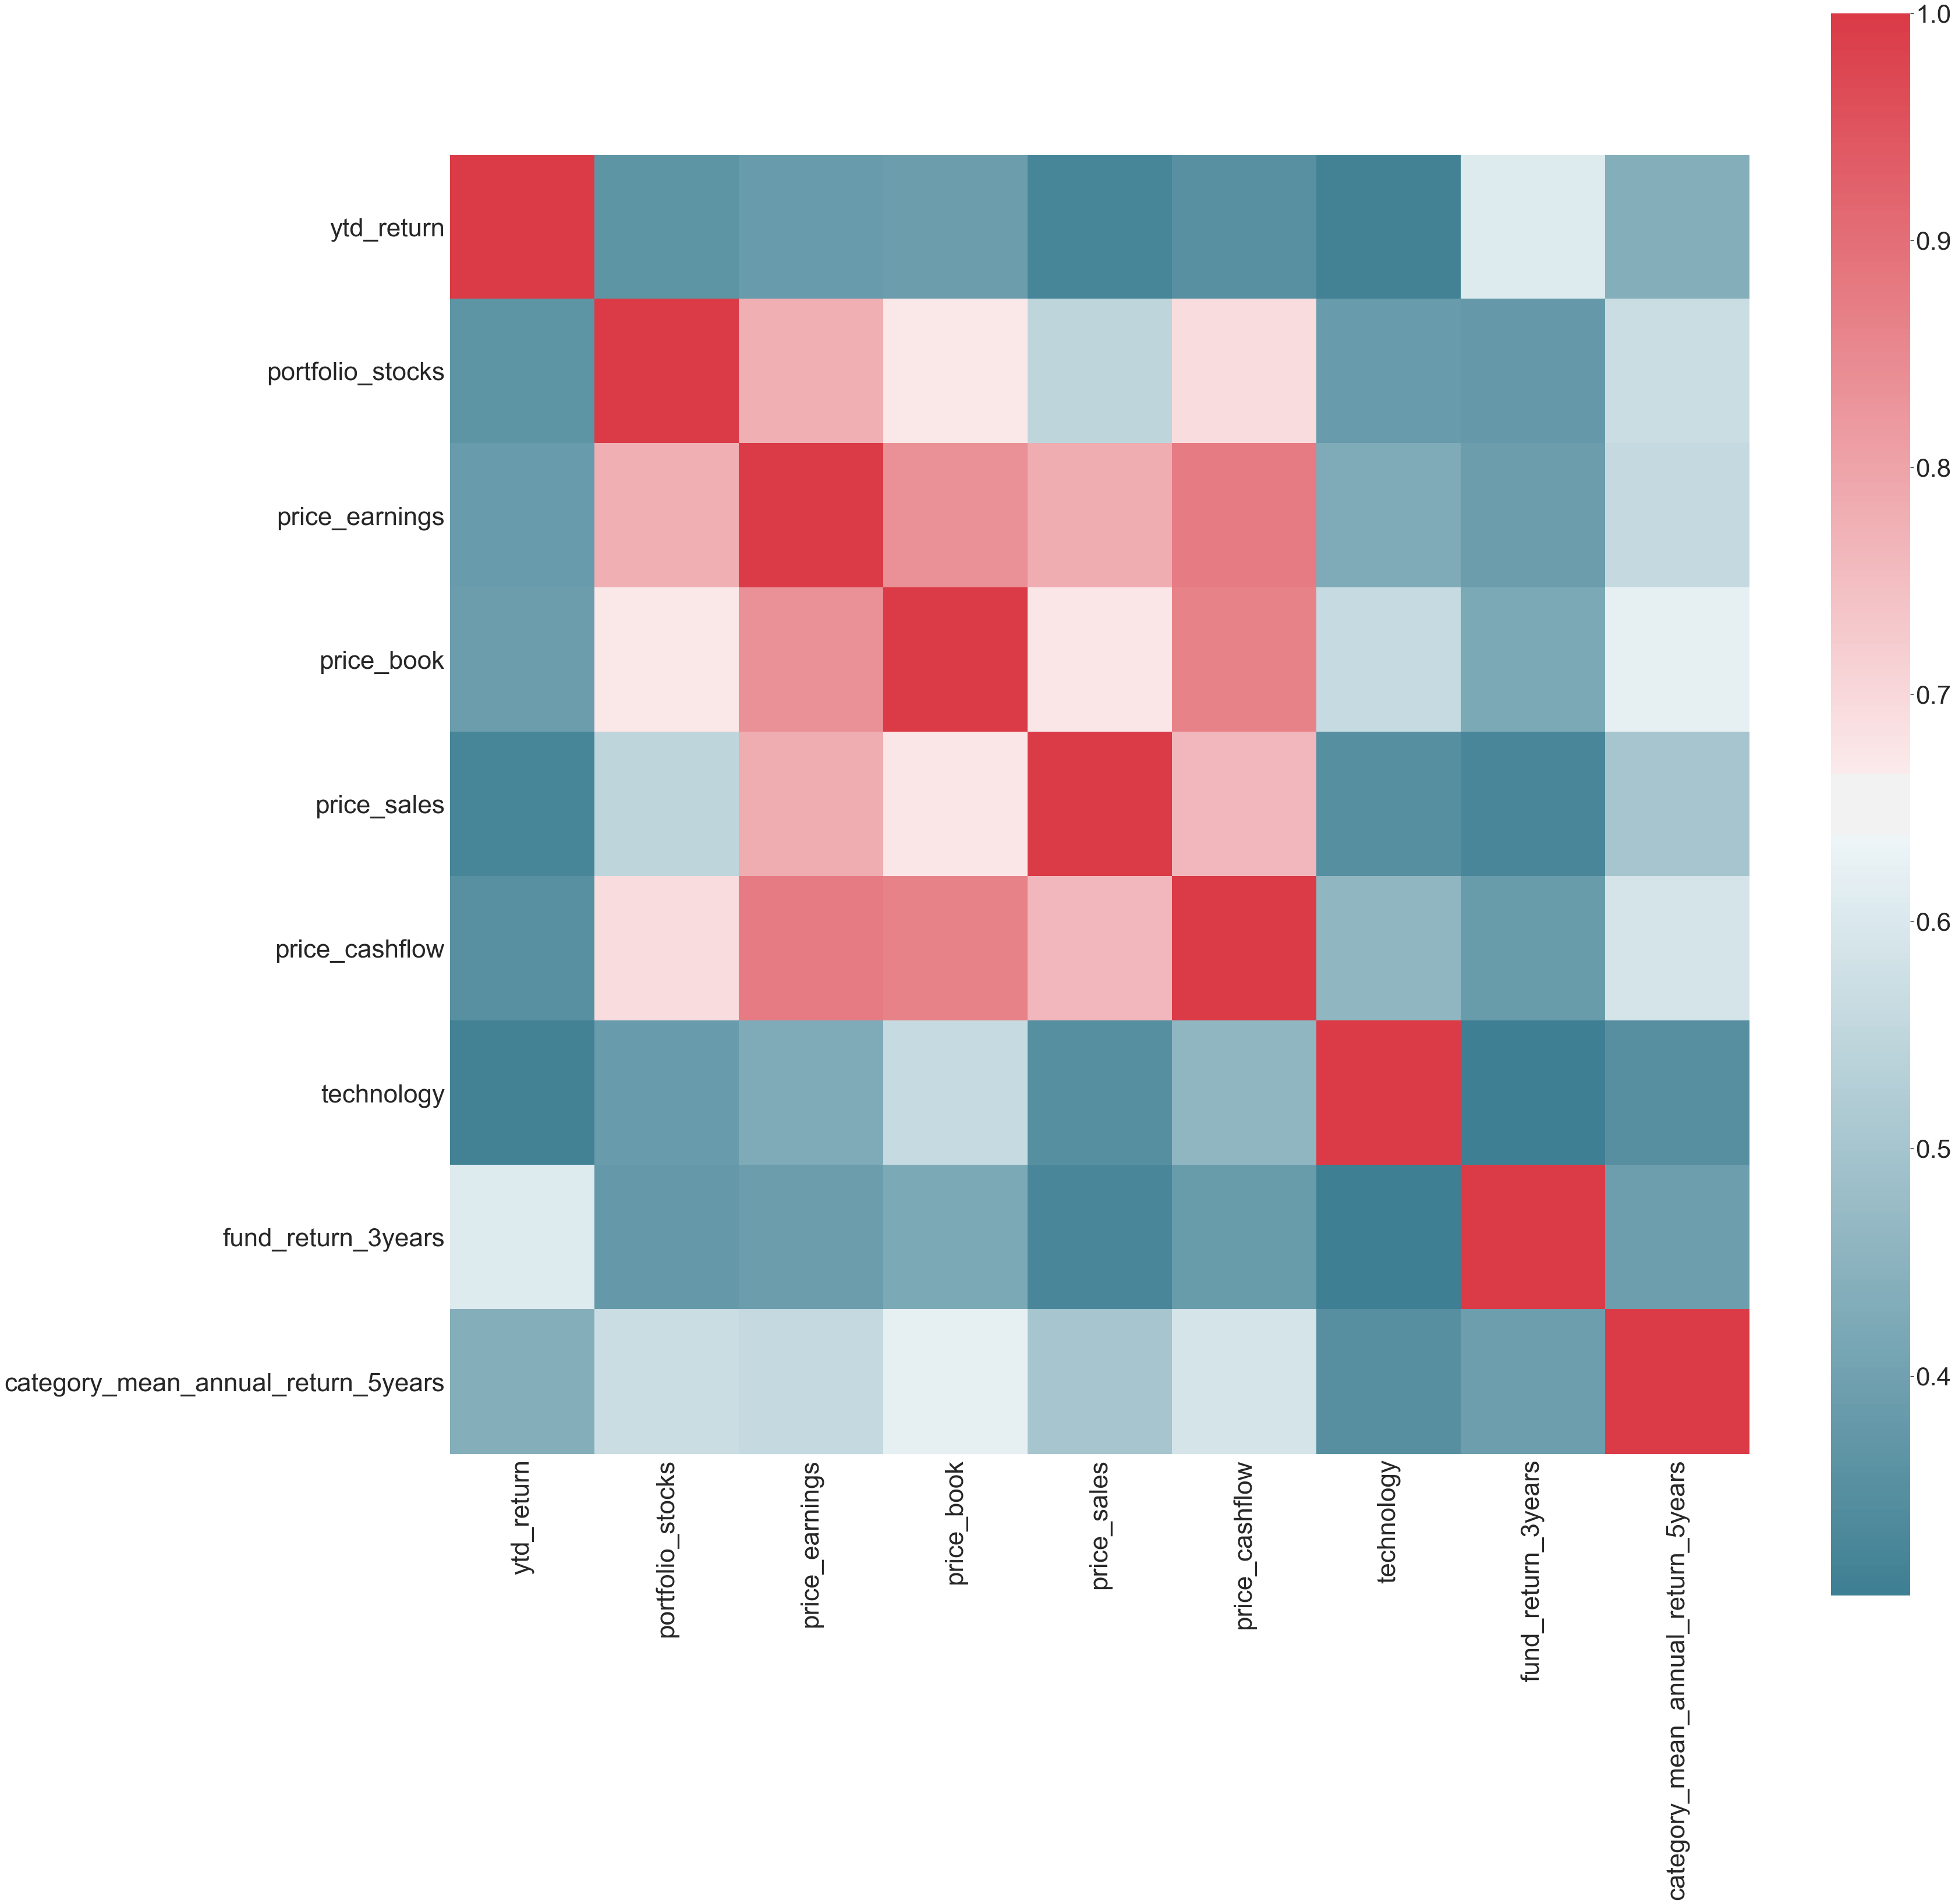

In [15]:
corr_mtx(df_etf, unique=False)

In [16]:
def scatter_mtx(df, figsize=50, cap=10):
    df = df.select_dtypes(np.number)
    if len(list(df)) > cap:
        df = df[list(df)[:cap]]
    scatter_matrix = pd.plotting.scatter_matrix(df, alpha=0.2, figsize=(figsize, figsize), diagonal='kde')
    for ax in scatter_matrix.ravel():
        ax.set_xlabel(ax.get_xlabel(), fontsize=30, rotation=90)
        ax.set_ylabel(ax.get_ylabel(), fontsize=30, rotation=0)
    plt.show()

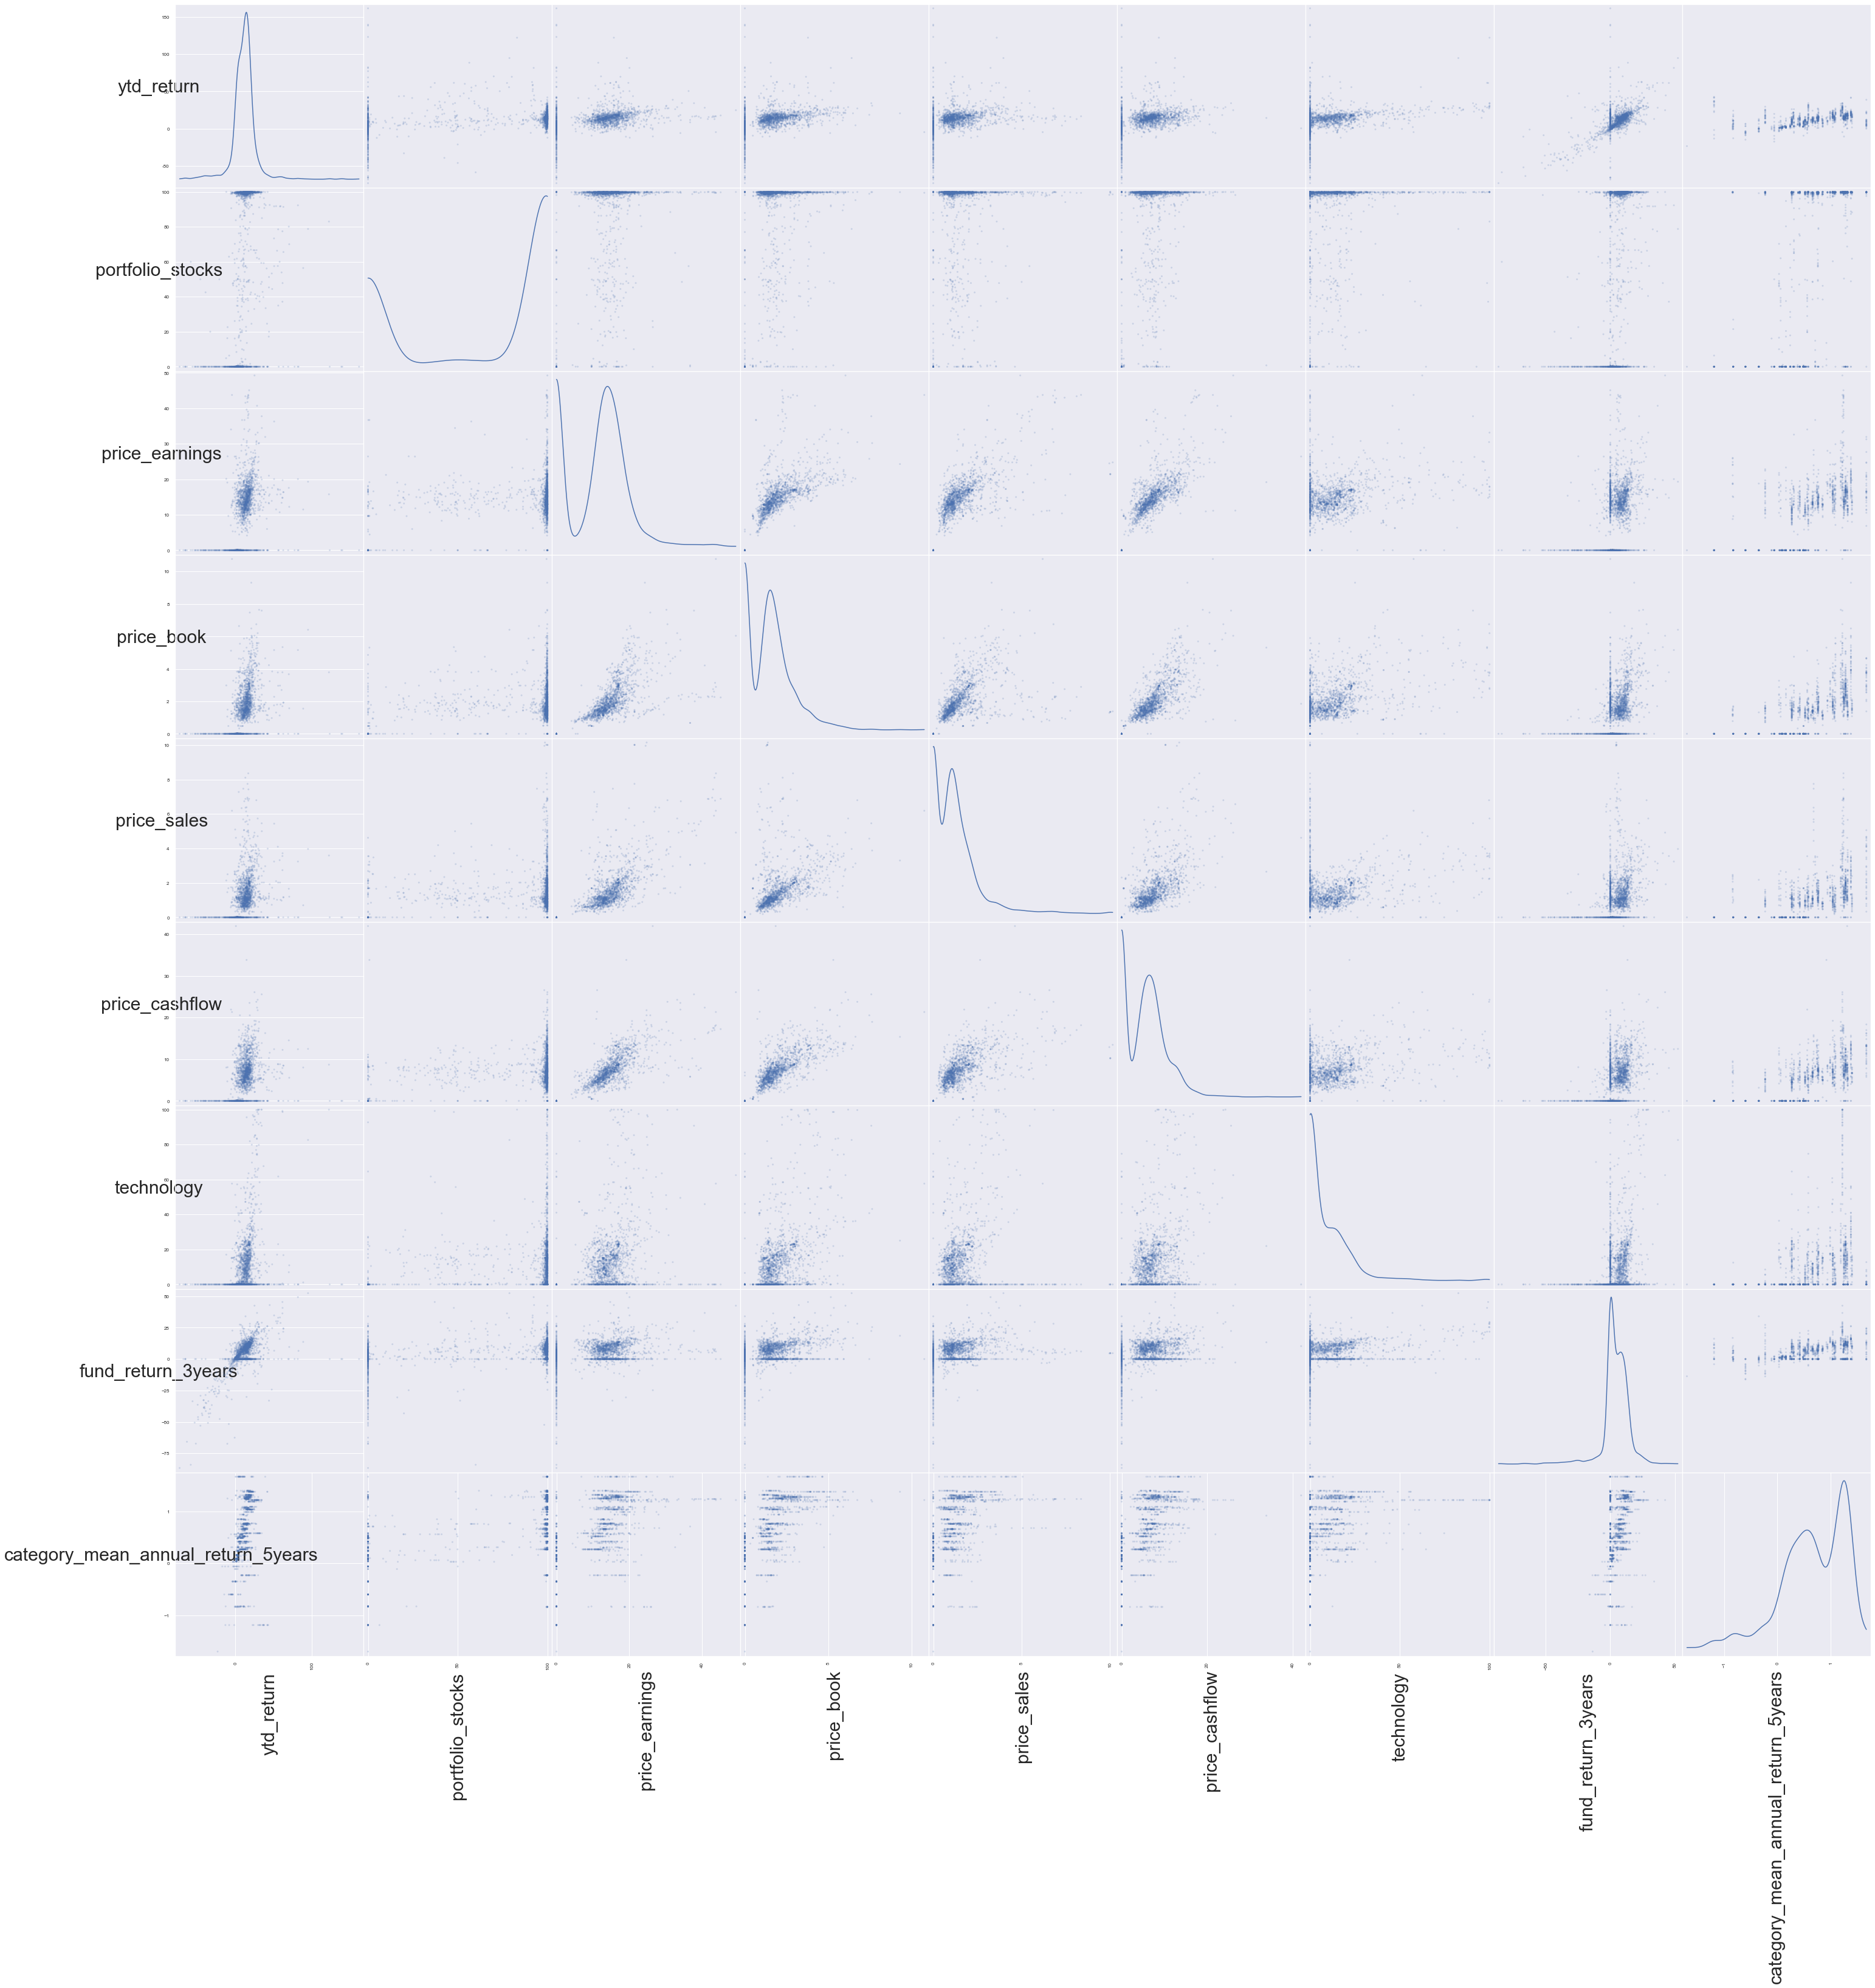

In [17]:
scatter_mtx(df_etf)

### MF Visualization

In [18]:
types(df_mf)

Str fund_name object
Str fund_extended_name object
Str category object
Str fund_family object
Num net_assets float64
Num ytd_return float64
Num fund_yield float64
Num morningstar_rating int64
Str inception_date object
Str investment object
Str size object
Str currency object
Num net_annual_expense_ratio_fund float64
Num net_annual_expense_ratio_category float64
Num portfolio_cash float64
Num portfolio_stocks float64
Num portfolio_bonds float64
Num portfolio_others float64
Num portfolio_preferred float64
Num portfolio_convertable float64
Str price_earnings object
Num price_book float64
Str price_sales object
Str price_cashflow object
Str median_market_cap object
Num basic_materials float64
Num consumer_cyclical float64
Num financial_services float64
Num real_estate float64
Num consumer_defensive float64
Num healthcare float64
Num utilities float64
Num communication_services float64
Num energy float64
Num industrials float64
Num technology float64
Num bond_maturity float64
Num bond_durat

In [19]:
describe(df_mf)

DataFrame summary:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25308 entries, 0 to 25307
Columns: 125 entries, fund_name to category_treynor_ratio_10years
dtypes: float64(109), int64(1), object(15)
memory usage: 24.1+ MB
None

Columns summary:
fund_name
count     25308
unique    25308
top       MLOCX
freq          1
Name: fund_name, dtype: object
MLOCX    1
MNVRX    1
SPSRX    1
FCAVX    1
GFRSX    1
        ..
COSVX    1
VCIEX    1
ODINX    1
DAINX    1
STMOX    1
Name: fund_name, Length: 25308, dtype: int64

fund_extended_name
count                                               25308
unique                                              25265
top       MassMutual Select Funds - RetireSMART 2010 Fund
freq                                                    4
Name: fund_extended_name, dtype: object
MassMutual Select Funds - RetireSMART 2010 Fund                                    4
MainStay Funds Trust - MainStay Epoch Global Choice Fund                           4
Hatteras Alternat

0.00      8148
100.00     109
13.38       73
15.63       53
16.79       50
          ... 
20.55        1
2.23         1
50.08        1
9.93         1
28.46        1
Name: financial_services, Length: 2287, dtype: int64

real_estate
count    25193.000000
mean         4.928513
std         13.863994
min          0.000000
25%          0.000000
50%          1.550000
75%          4.440000
max        100.000000
Name: real_estate, dtype: float64
0.00      10331
2.50         75
3.73         67
100.00       65
2.51         63
          ...  
12.07         1
17.30         1
16.51         1
95.53         1
16.01         1
Name: real_estate, Length: 1404, dtype: int64

consumer_defensive
count    25193.000000
mean         5.113315
std          6.098919
min          0.000000
25%          0.000000
50%          4.840000
75%          7.880000
max        100.000000
Name: consumer_defensive, dtype: float64
0.00     8952
7.76       79
7.95       77
7.67       71
7.56       69
         ... 
14.91       1
5.

count    24354.000000
mean        -6.687053
std          6.683230
min        -59.100000
25%        -10.520000
50%         -5.800000
75%         -1.620000
max         39.470000
Name: fund_return_2018, dtype: float64
 0.53     29
 0.14     29
-8.74     29
 0.31     29
-4.70     28
          ..
 7.19      1
-27.69     1
-26.93     1
 5.40      1
-21.40     1
Name: fund_return_2018, Length: 3145, dtype: int64

category_return_2018
count    24491.000000
mean        -6.484957
std          5.421304
min        -27.270000
25%         -9.270000
50%         -6.250000
75%         -2.090000
max          7.190000
Name: category_return_2018, dtype: float64
-5.76     1342
-2.09     1311
-6.27     1252
-8.53     1108
-0.50      956
          ... 
-3.26       20
-14.88      15
-5.67       15
-10.92      13
-3.35        2
Name: category_return_2018, Length: 99, dtype: int64

fund_return_2017
count    22722.000000
mean        15.154533
std         11.176769
min        -96.220000
25%          6.250000
50% 

count    23639.000000
mean         0.636010
std          0.435884
min         -3.190000
25%          0.330000
50%          0.620000
75%          0.890000
max          2.980000
Name: fund_mean_annual_return_3years, dtype: float64
 0.14    269
 0.80    268
 0.63    257
 0.62    256
 0.17    254
        ... 
 2.03      1
-1.48      1
-1.26      1
-0.84      1
-2.34      1
Name: fund_mean_annual_return_3years, Length: 389, dtype: int64

category_mean_annual_return_3years
count    25200.000000
mean         0.006511
std          0.005045
min         -0.020000
25%          0.000000
50%          0.010000
75%          0.010000
max          0.020000
Name: category_mean_annual_return_3years, dtype: float64
 0.01    16160
 0.00     8806
 0.02      179
-0.02       55
Name: category_mean_annual_return_3years, dtype: int64

fund_mean_annual_return_5years
count    21414.000000
mean         0.437176
std          0.341544
min         -2.960000
25%          0.230000
50%          0.410000
75%          0.6

7.7       29
14.92     25
7.42      23
13.42     23
12.37     22
          ..
25.96      1
-33.16     1
1.67       1
8.77       1
2.34       1
Name: fund_treynor_ratio_10years, Length: 3167, dtype: int64

category_treynor_ratio_10years
count    25200.000000
mean         0.138881
std          0.442711
min         -0.190000
25%          0.070000
50%          0.100000
75%          0.140000
max          4.680000
Name: category_treynor_ratio_10years, dtype: float64
 0.14    4489
 0.08    3856
 0.04    2120
 0.09    1658
 0.15    1458
 0.10    1390
 0.13    1364
 0.05    1358
 0.12    1254
 0.11     977
 0.07     751
 0.23     685
 0.06     448
 0.00     417
 0.02     386
 0.21     379
 0.03     345
-0.02     328
-0.05     283
 4.68     233
 0.19     231
-0.14     195
 0.18     163
-0.10     144
 0.16     105
 0.17      57
-0.19      51
 0.30      50
 0.01      25
Name: category_treynor_ratio_10years, dtype: int64



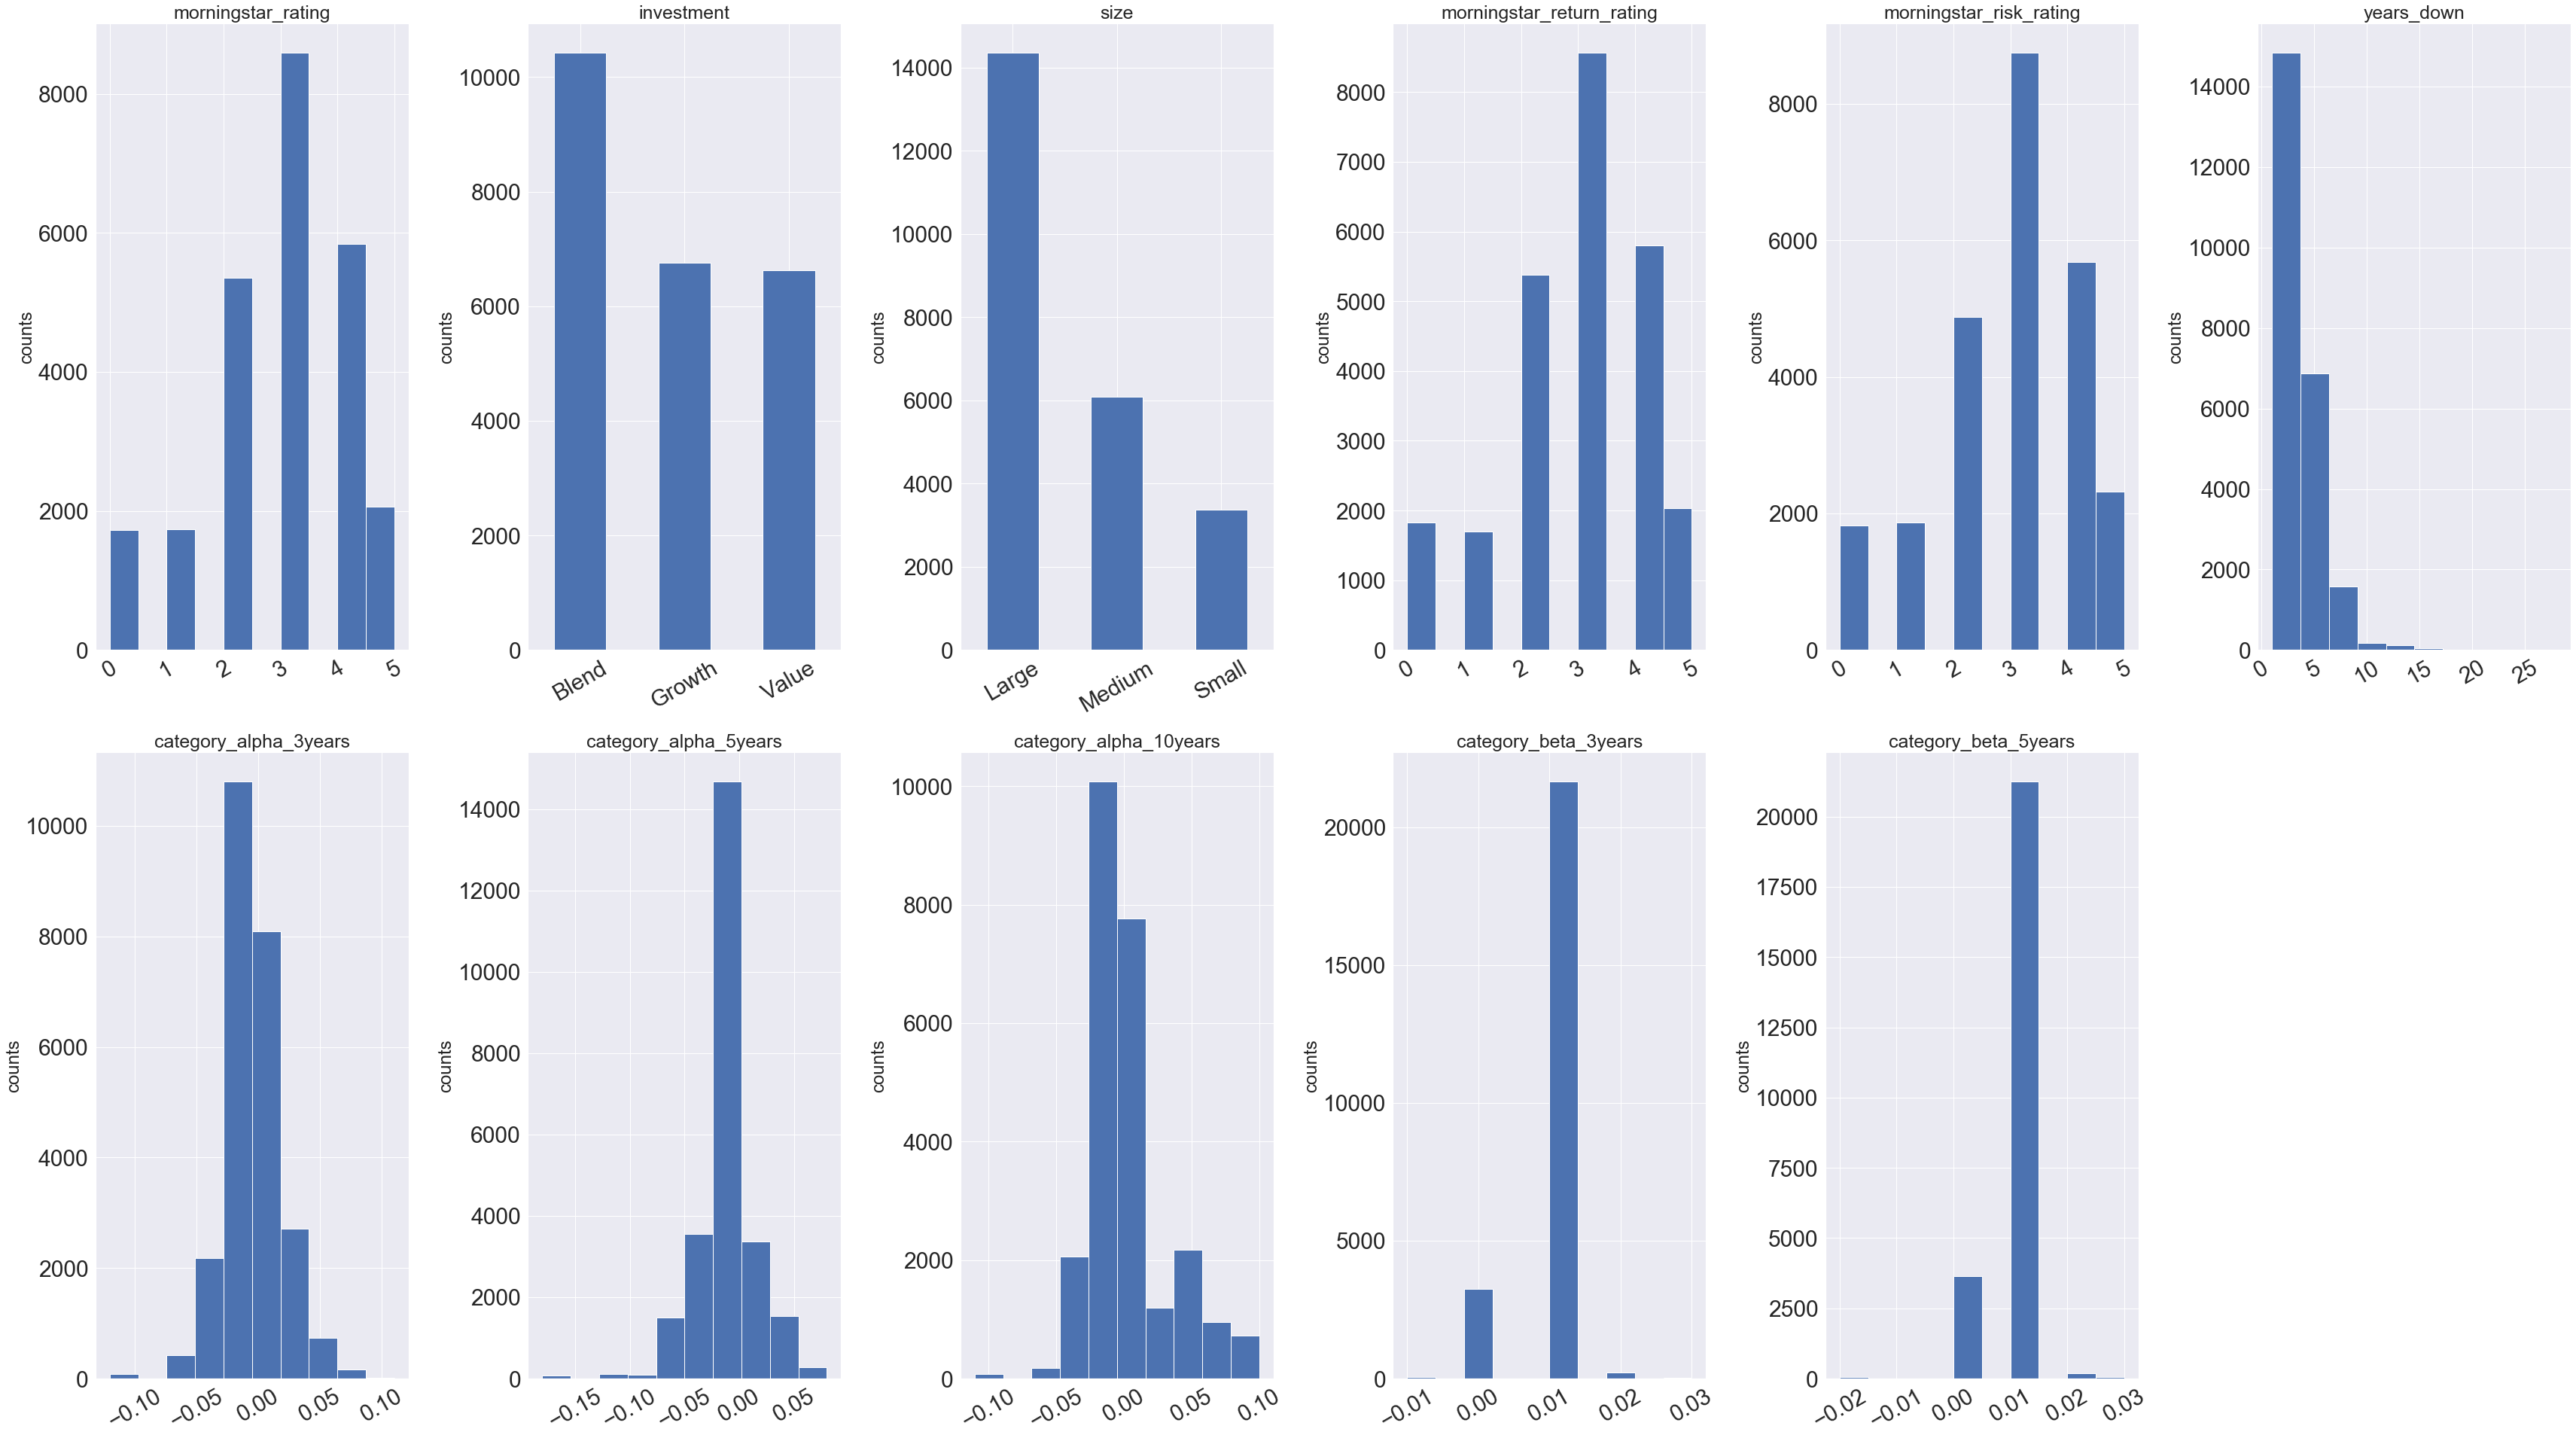

In [20]:
hist_bar_plot(df_mf)

In [21]:
df_mf = correlation_clean(df_mf, threshold=(-0.9, -0.6, 0.6, 0.9))

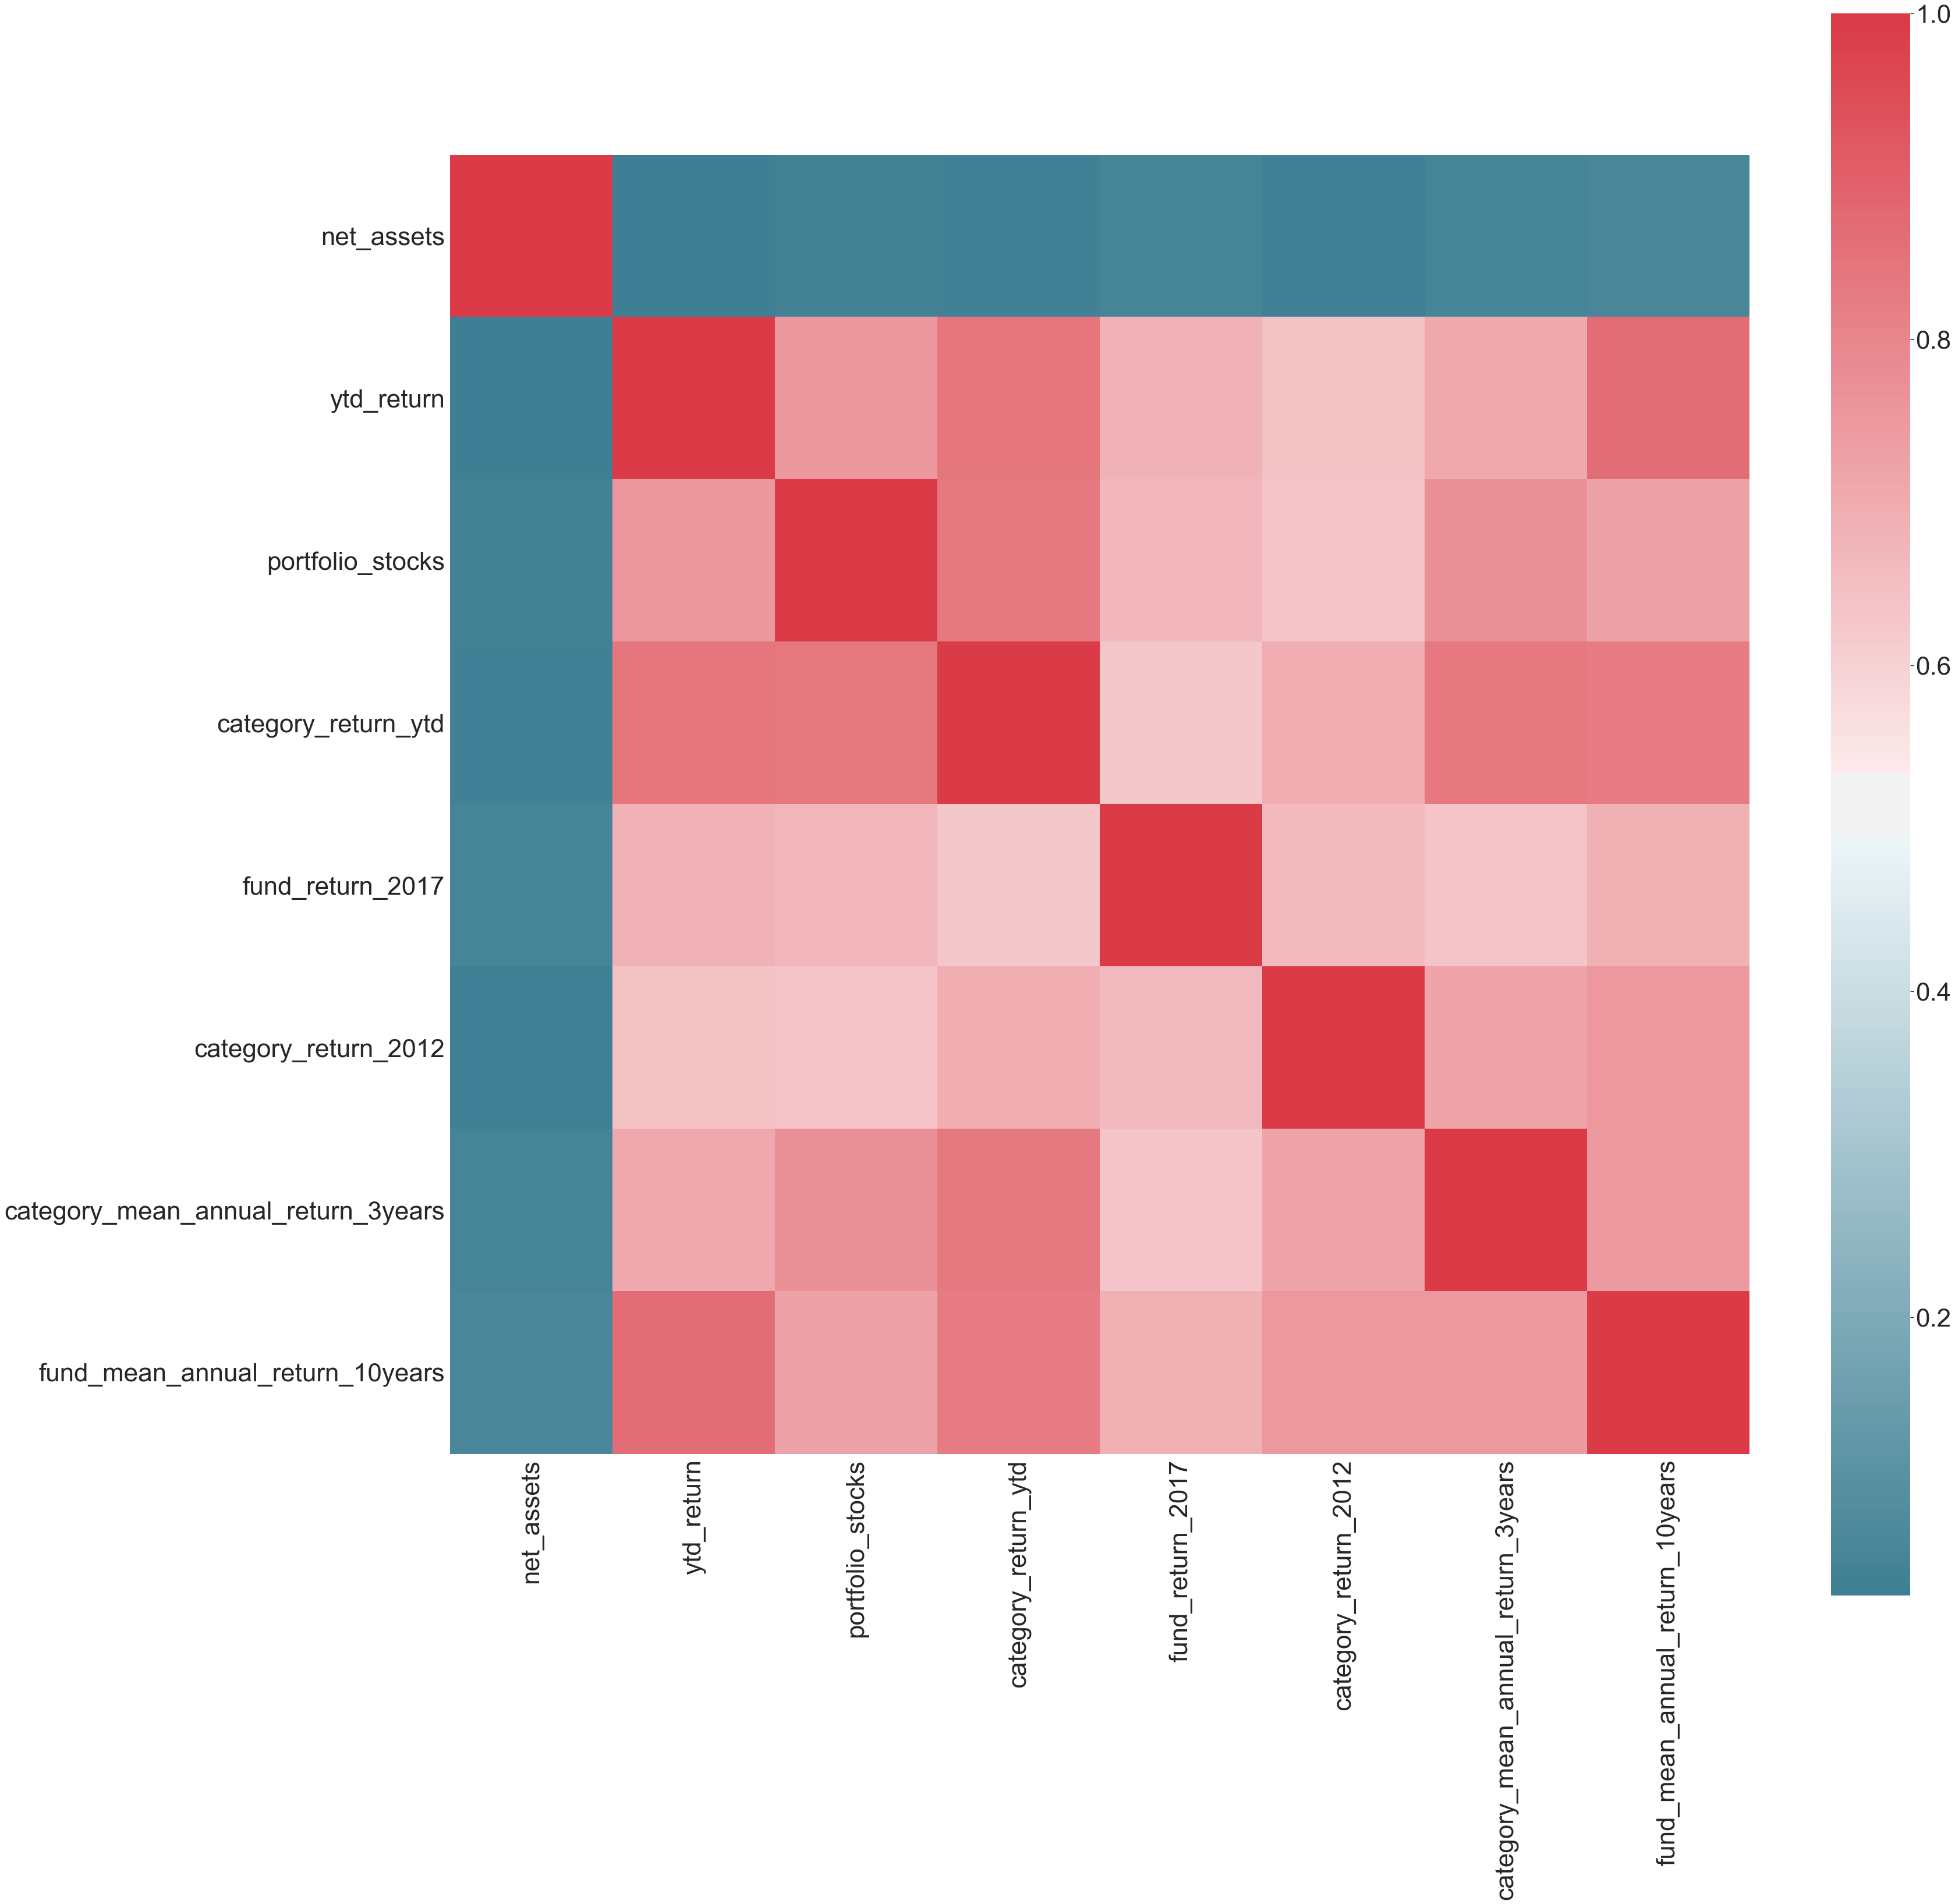

In [22]:
corr_mtx(df_mf, unique=False)

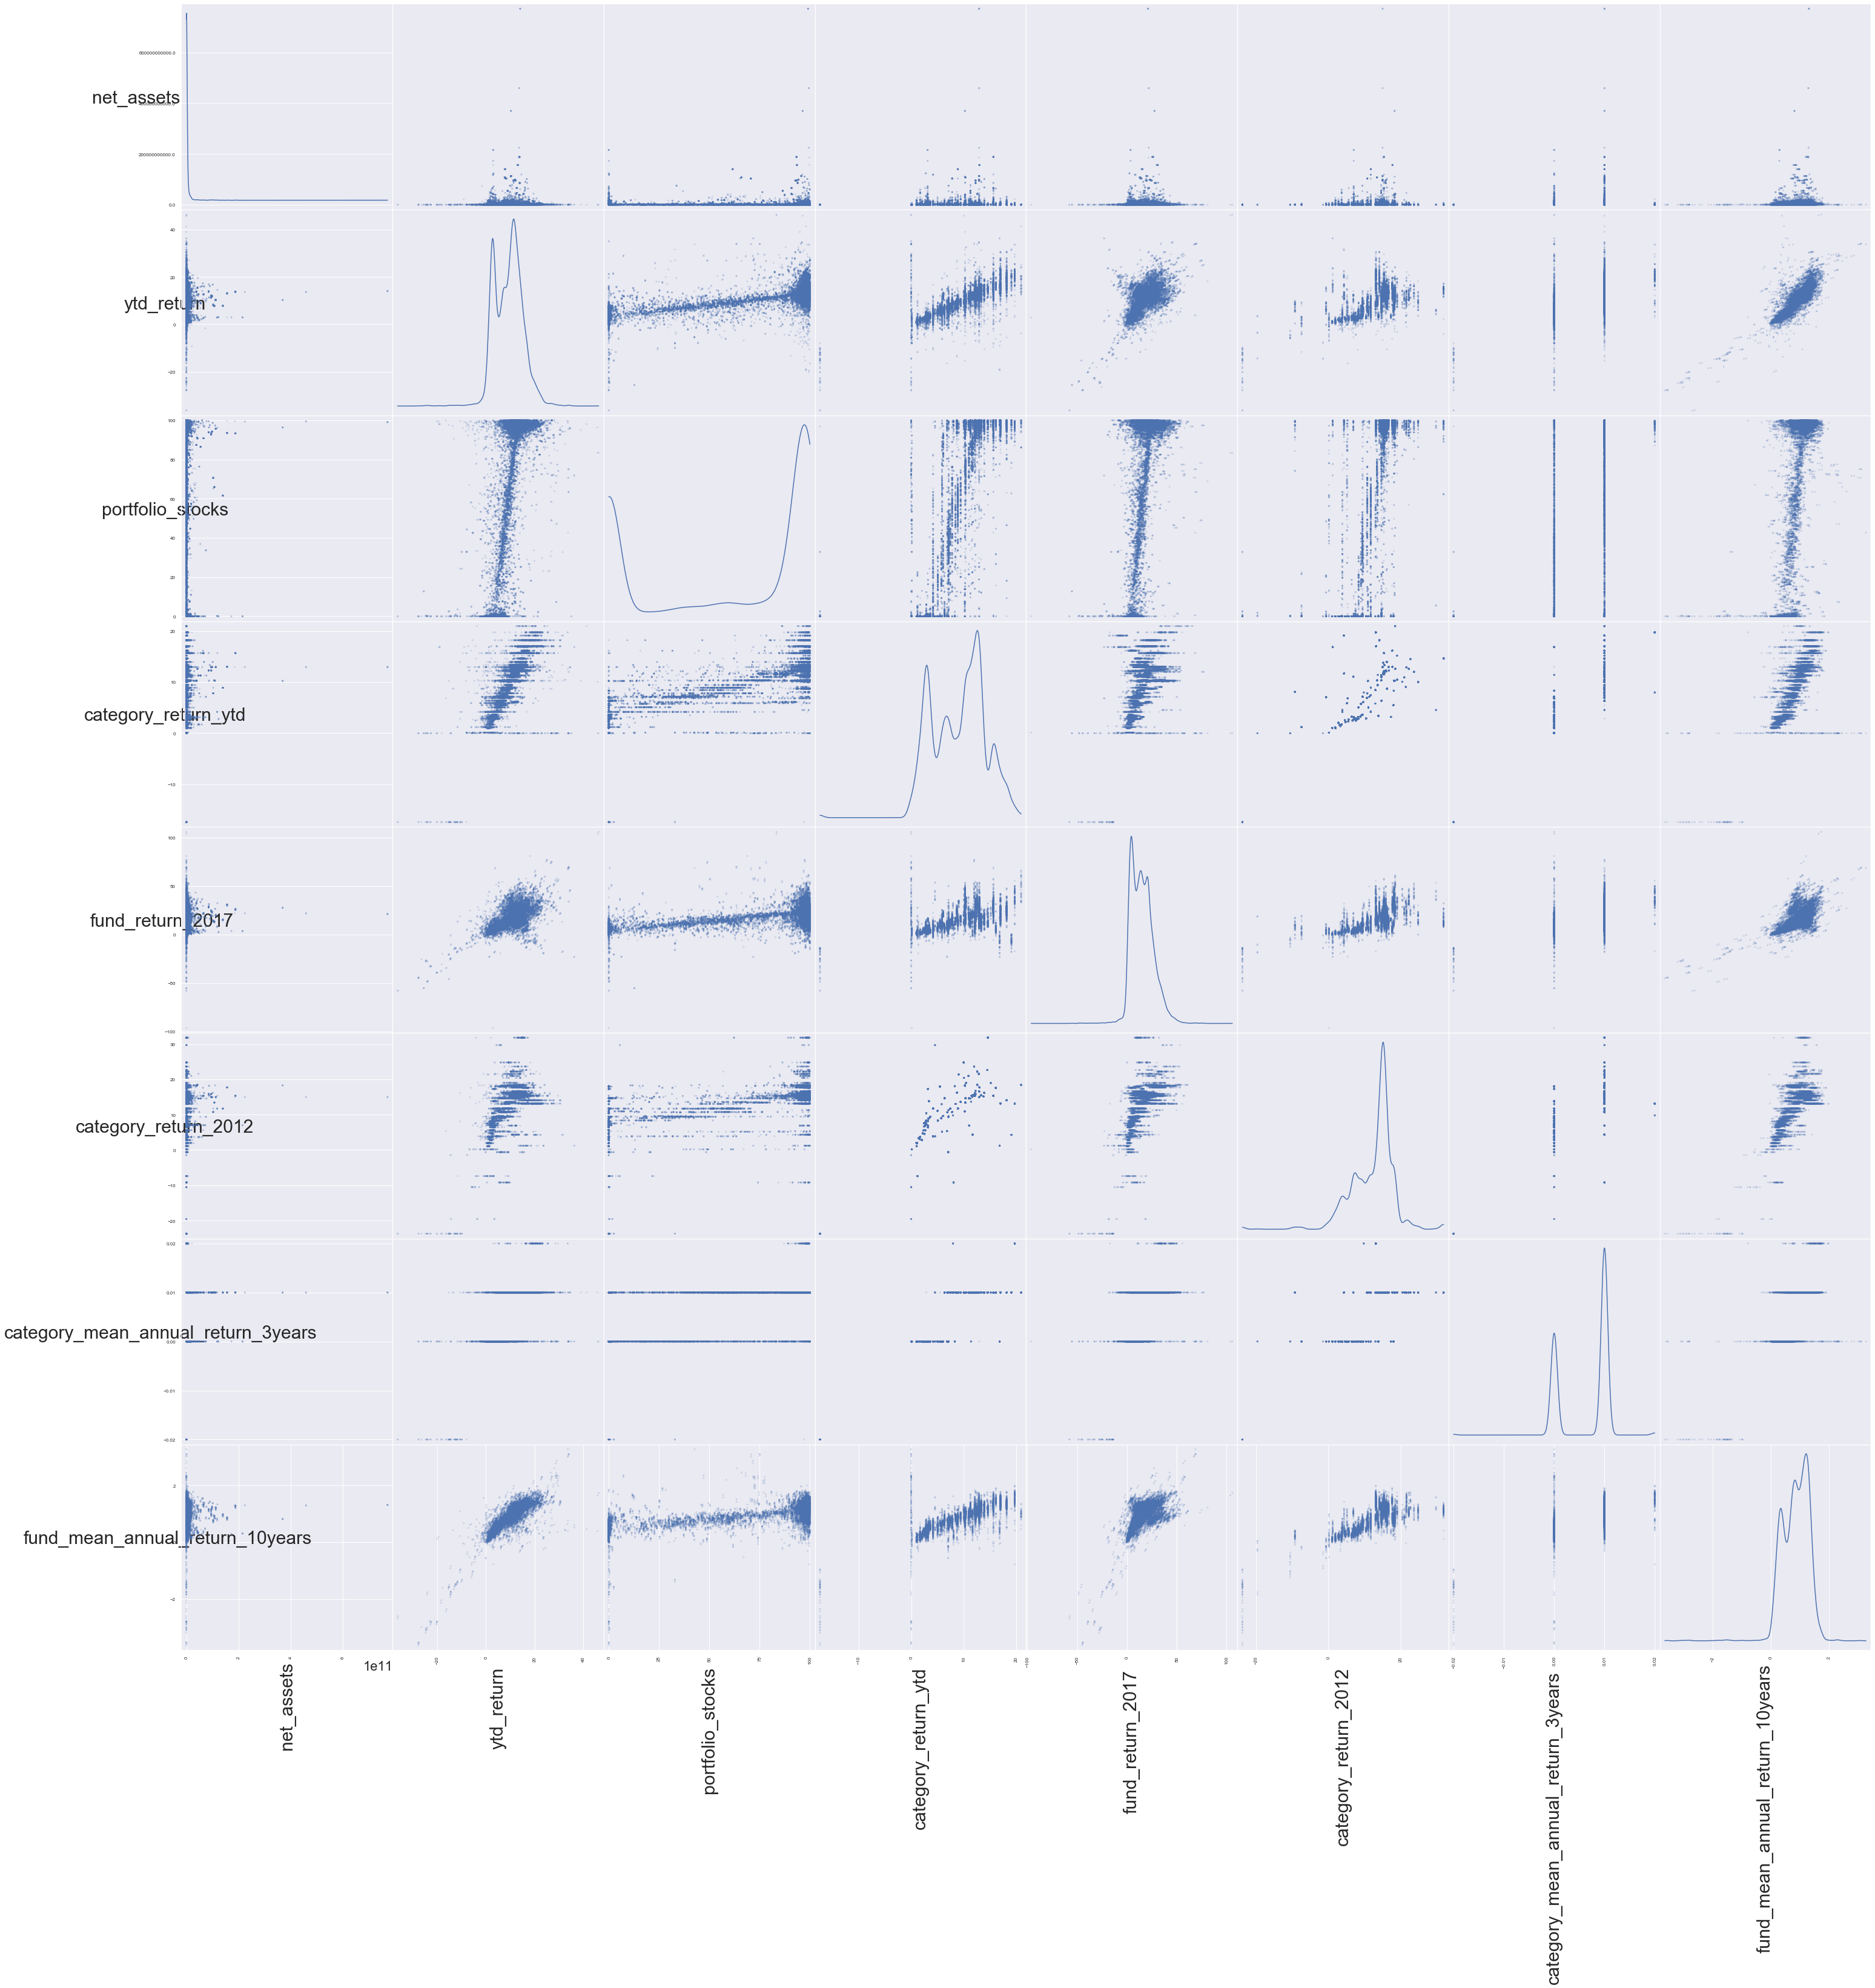

In [23]:
scatter_mtx(df_mf, cap=20)

### Dataset Cleaning

In [24]:
df_etf, df_mf = load_dataset() # Load again because of 'correlation_clean' function

C:\Users\NVukobrat\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3254: DtypeWarning: Columns (20,22,23,119,121,123) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


In [25]:
def gaussian_clean(df, dataset_type):
    """

    :param df:
    :param dataset_type: etf or mf.
    :return:
    """
    # Fix NaN
    df.replace('', 'NaN', inplace=True)
    df.replace('nan', 'NaN', inplace=True)
    df.replace('NaN', np.nan, inplace=True)

    # As consequence of too many NaN values
    migrate_columns = [
        'fund_treynor_ratio_3years',
    ]
    if dataset_type == 'etf':
        migrate_columns += [
            'category_treynor_ratio_5years',
        ]
    elif dataset_type == 'mf':
        migrate_columns += [
            'price_cashflow',
            'price_sales',
            'price_earnings',
            'median_market_cap',
            'fund_treynor_ratio_5years',
            'fund_treynor_ratio_10years',
        ]

    # Join together numerical columns
    num_mean = df.select_dtypes(np.number)
    for col in migrate_columns:
        num_mean = num_mean.join(pd.to_numeric(df[col], errors="coerce"))

    # Columns with low-value information (ignored during initial analysis)
    low_info_categorical_columns = [
        'category',
        'currency',
        'fund_extended_name',
        'fund_family',
        'fund_name',
    ]
    if dataset_type == 'etf':
        low_info_categorical_columns += [
            'legal_type',
        ]
    elif dataset_type == 'mf':
        low_info_categorical_columns += [
            'inception_date',
        ]

    # Join together categorical (without low-value) columns
    str_mean = df[df.columns.difference(num_mean.columns)]
    for col in low_info_categorical_columns:
        str_mean = str_mean.drop(col, axis=1)

    # Populate empty values in categorical columns
    for col in list(str_mean):
        unique = str_mean[col].unique()
        unique = [x for x in unique if str(x) != 'nan']
        for i, value in enumerate(str_mean[col]):
            if value is np.nan:
                choice = random.choice(unique)
                str_mean[col].iloc[i] = choice

    # Encode categorical columns
    le = LabelEncoder()
    for col in str_mean:
        df[col] = le.fit_transform(str_mean[col])

    # One-hot encode categorical columns
    ohe = OneHotEncoder()
    for col in str_mean:
        unique = str_mean[col].unique()
        unique = [col + "_" + x for x in unique if str(x) != 'nan']
        enc_df = pd.DataFrame(ohe.fit_transform(df[[col]]).toarray(), columns=unique)
        df = df.drop(col, axis=1)
        df = df.join(enc_df)

    mu = num_mean.quantile(0)
    sigma = num_mean.std(axis=0)
    for col in num_mean:
        stack = num_mean[col]
        null_stack = stack[pd.isnull(stack)]
        ran = np.random.normal(mu[col], sigma[col], len(null_stack))
        stack.loc[null_stack.index] = ran
        df[col] = stack.values

    # Clean
    df_dropped = pd.DataFrame()
    for col in low_info_categorical_columns:
        df_dropped[col] = df[col].copy()
        df = df.drop(col, axis=1)

    return df, df_dropped

In [26]:
df_etf, df_etf_dropped = gaussian_clean(df_etf, 'etf')
   

In [27]:
   
df_mf, df_mf_dropped = gaussian_clean(df_mf, 'mf')

C:\Users\NVukobrat\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


### Visualize after cleaning

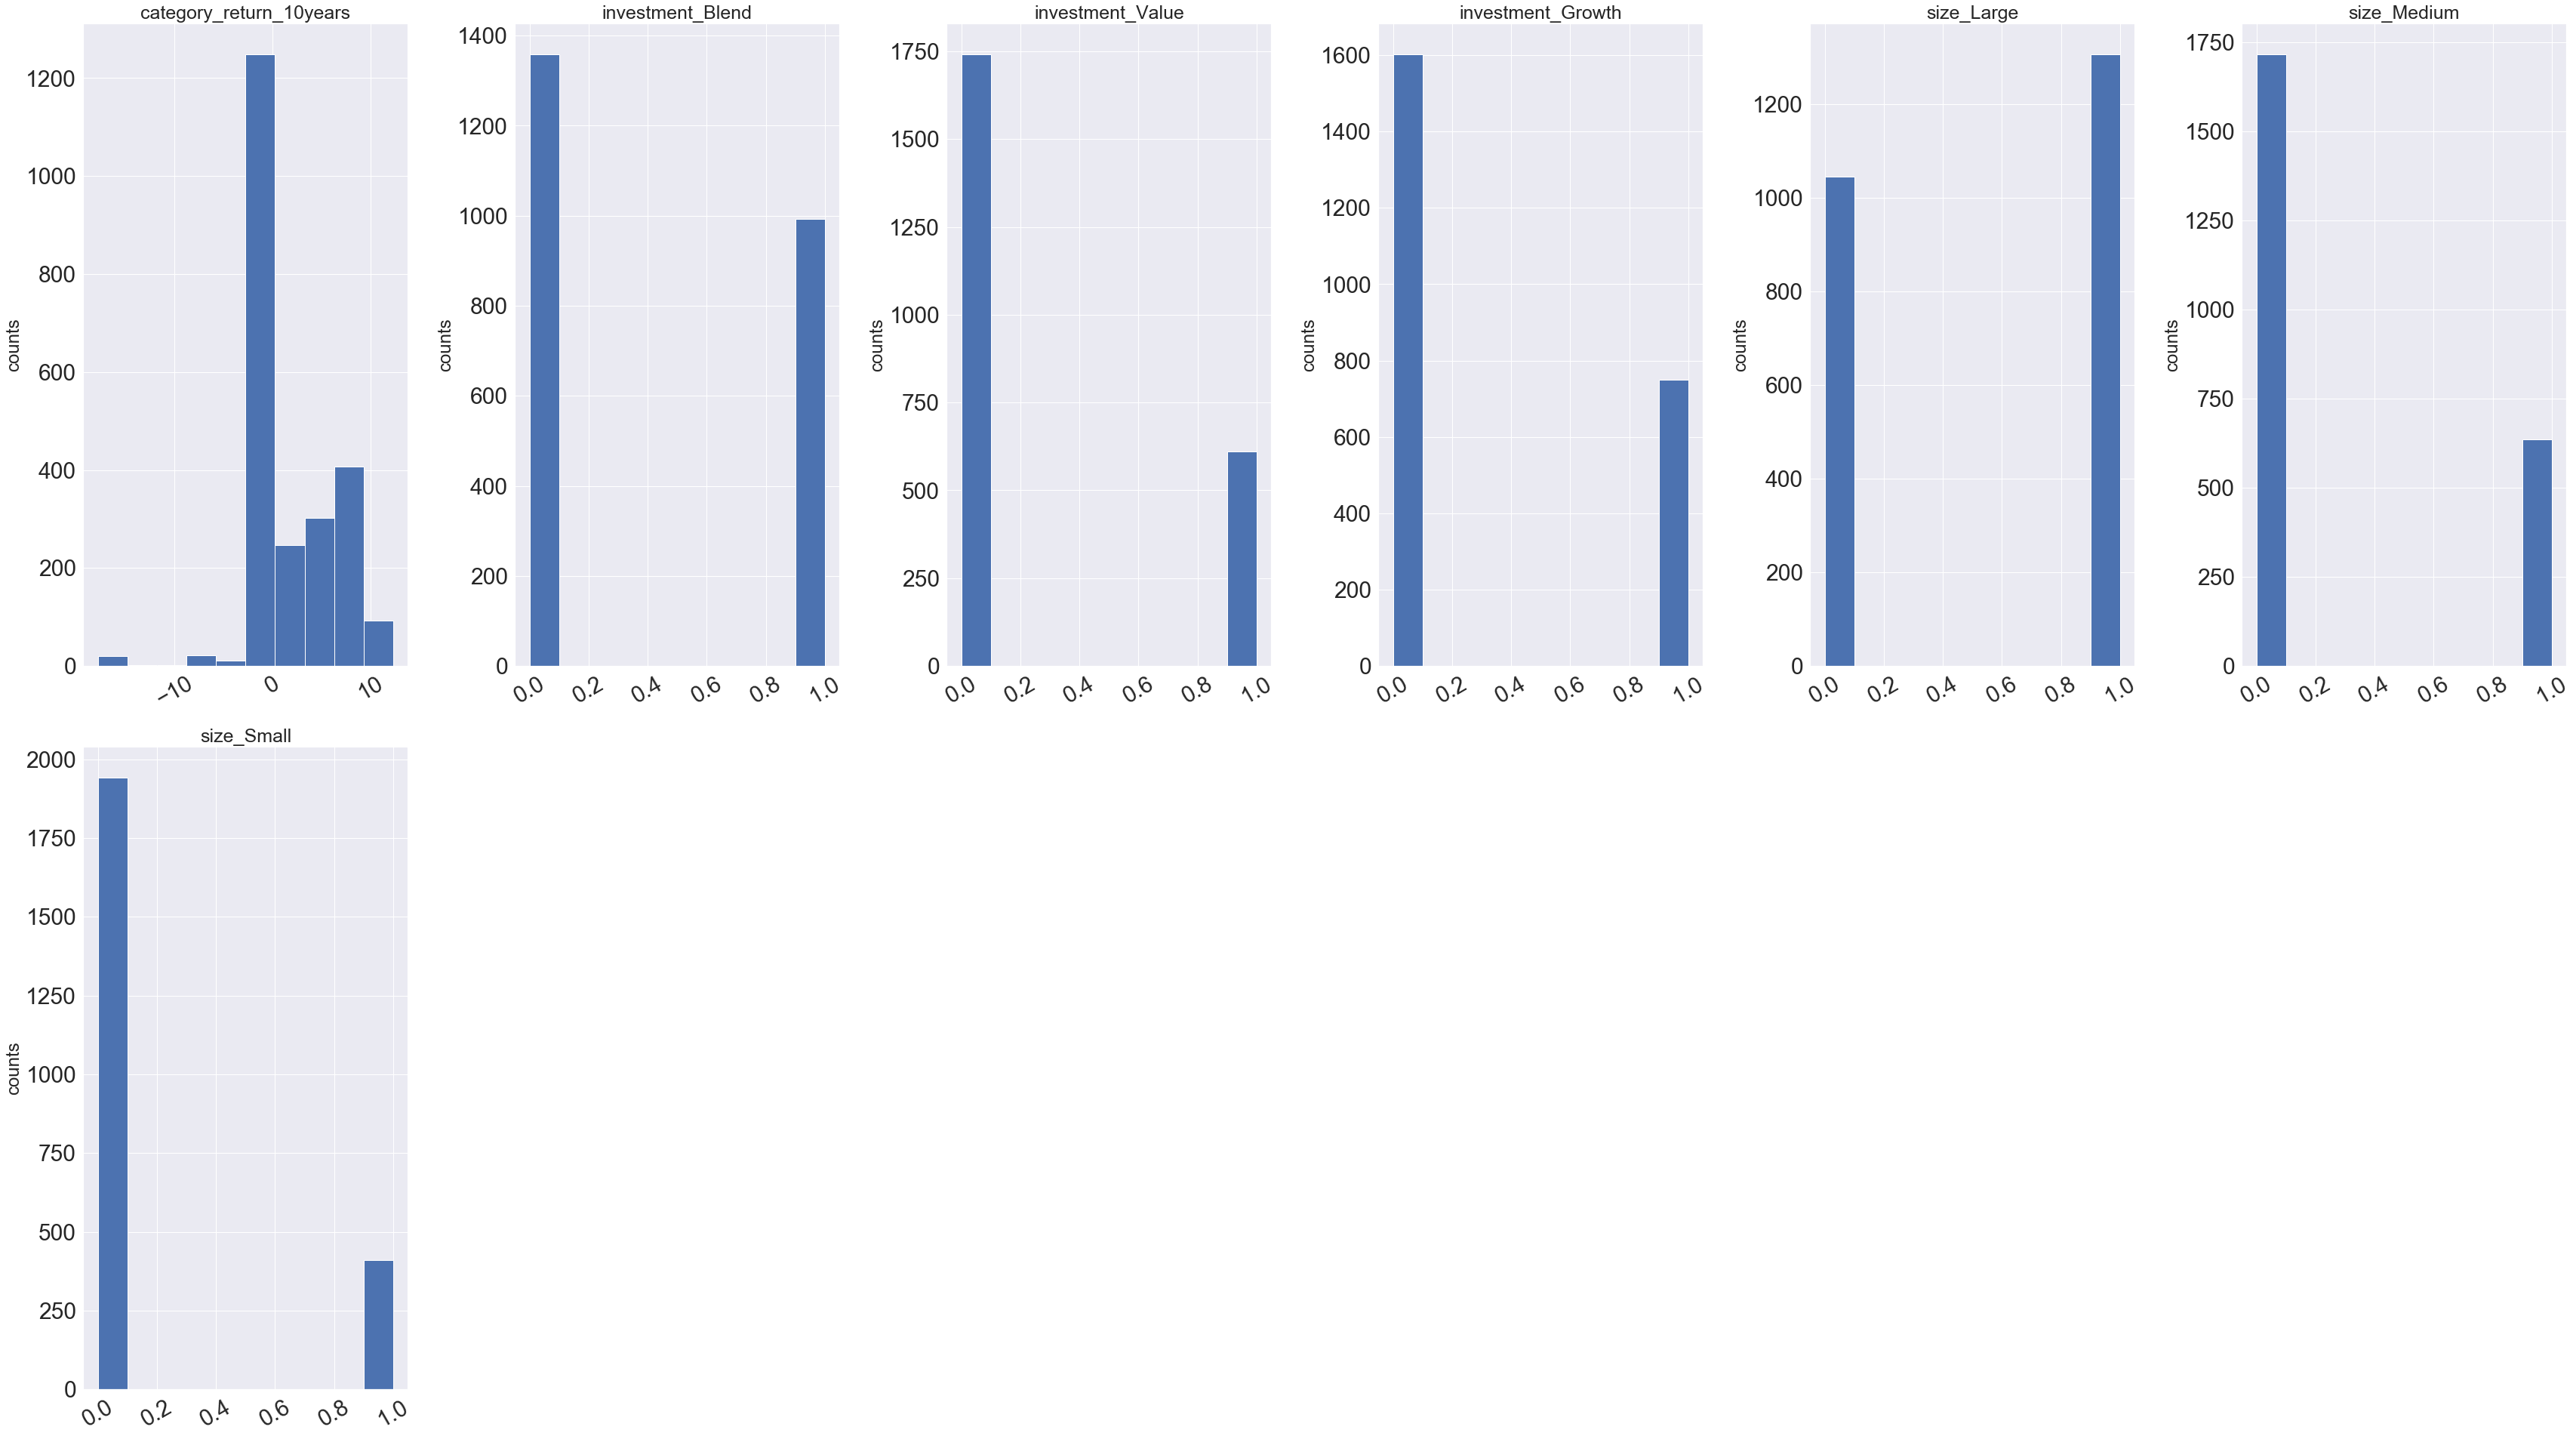

In [28]:
hist_bar_plot(df_etf)

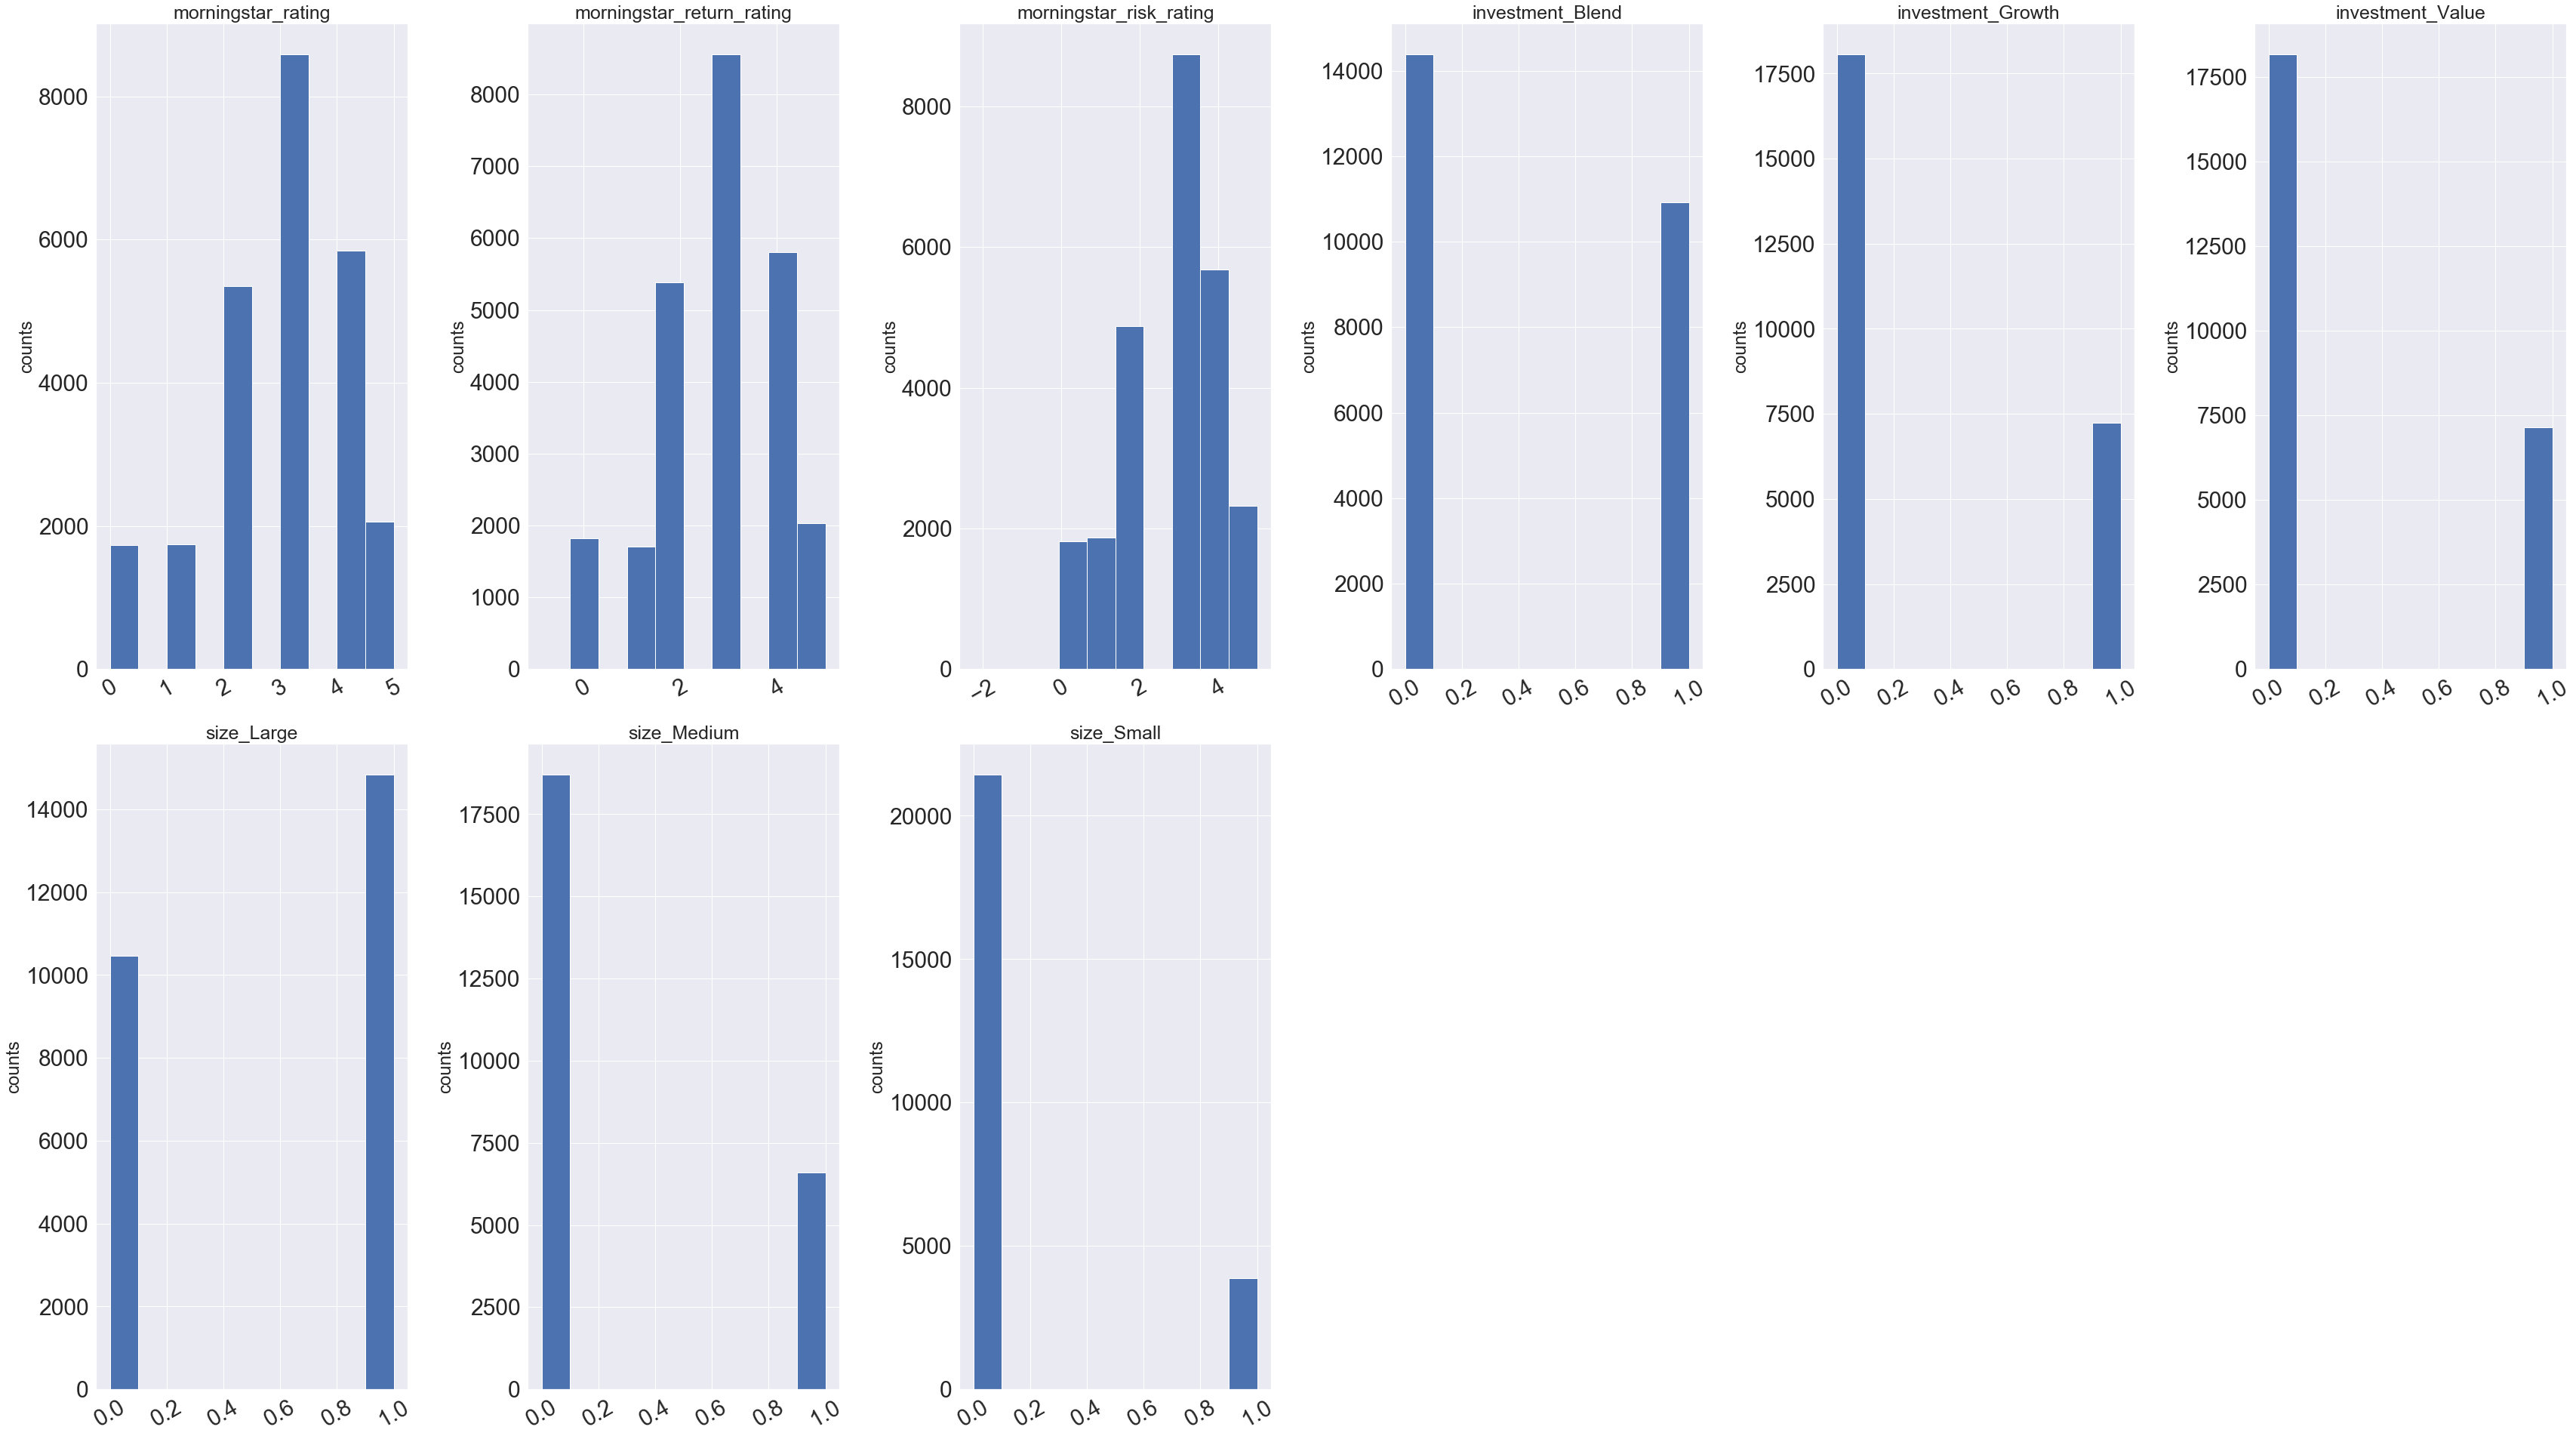

In [29]:
hist_bar_plot(df_mf)

### Training

In [30]:
regressors = [
    # svm.SVR(),
    linear_model.SGDRegressor(),
    linear_model.BayesianRidge(),
    linear_model.LassoLars(),
    # linear_model.ARDRegression(),
    linear_model.PassiveAggressiveRegressor(),
    # linear_model.TheilSenRegressor(),
    linear_model.LinearRegression(),
]

In [31]:
def dataset_split(df, index_col):
    train, test = train_test_split(df, test_size=0.2, random_state=rnd_seed_state)
    y_train = train[index_col].copy()
    del train[index_col]

    y_test = test[index_col].copy()
    del test[index_col]

    return train, test, y_train, y_test

In [32]:
x_train, x_test, y_train, y_test = dataset_split(df_etf, index_col="ytd_return")

In [33]:
def run_models(regressors, x_train, x_test, y_train, y_test, res):
    print("Running models...")
    for model in regressors:
        start_time = time.time()
        model_name = type(model).__name__
        print("\tModel: {}".format(model_name))
        clf = model
        clf.fit(x_train, y_train)
        y_pred = clf.predict(x_test)
        res[model_name] = {}
        result_metrics(y_test, y_pred, res[model_name])
        print("\tExecution time: %s seconds\n" % (round((time.time() - start_time), 3)))
        
def result_metrics(actual, predicted, res, print_adjust=50):
    """
    Explained variance score
    If \hat{y} is the estimated target output,
    y the corresponding (correct) target output, and Var is Variance, the
    square of the standard deviation, then the explained variance is estimated
    as follow:

    explained\_{}variance(y, \hat{y}) = 1 - \frac{Var\{ y - \hat{y}\}}{Var\{y\}}

    The best possible score is 1.0, lower values are worse.



    :param actual:
    :param predicted:
    :param print_adjust:
    :return:
    """
    evs = metrics.explained_variance_score(actual, predicted)
    print("\t\tExplained variance score ".ljust(print_adjust, '.') + " {}".format(evs))
    res["EVS"] = evs

    me = metrics.max_error(actual, predicted)
    print("\t\tMax error ".ljust(print_adjust, '-') + " {}".format(me))
    res["ME"] = me

    mean_ae = metrics.mean_absolute_error(actual, predicted)
    print("\t\tMean absolute error ".ljust(print_adjust, '.') + " {}".format(mean_ae))
    res["MeanAE"] = mean_ae

    mse = metrics.mean_squared_error(actual, predicted)
    print("\t\tMean squared error ".ljust(print_adjust, '-') + " {}".format(mse))
    res["MSE"] = mse

    median_ae = metrics.median_absolute_error(actual, predicted)
    print("\t\tMedian absolute error ".ljust(print_adjust, '.') + " {}".format(median_ae))
    res["MedianAE"] = median_ae

    r2 = metrics.r2_score(actual, predicted)
    print("\t\tR² score, the coefficient of determination ".ljust(print_adjust, '-') + " {}".format(r2))
    res["R2"] = r2

    mtd = metrics.mean_tweedie_deviance(actual, predicted)
    print("\t\tMean Poisson, Gamma, and Tweedie deviances: ".ljust(50, '.') + " {}".format(mtd))
    res["MTD"] = mtd    

In [34]:
res = {
    'ETF': {},
    'MF': {},
}
run_models(regressors, x_train, x_test, y_train, y_test, res['ETF'])

Running models...
	Model: SGDRegressor
		Explained variance score ....................... -1.094937440723869e+59
		Max error -------------------------------------- 2.149462746797457e+32
		Mean absolute error ............................ 5.762051274758533e+29
		Mean squared error ----------------------------- 9.906320672567634e+61
		Median absolute error .......................... 3.9582751697969226e+27
		R² score, the coefficient of determination ----- -1.097729817491127e+59
		Mean Poisson, Gamma, and Tweedie deviances: .... 9.906320672567634e+61
	Execution time: 0.021 seconds

	Model: BayesianRidge
		Explained variance score ....................... 0.7020880890479329
		Max error -------------------------------------- 93.92369223532373
		Mean absolute error ............................ 9.689808682783582
		Mean squared error ----------------------------- 269.03905508104384
		Median absolute error .......................... 4.435398958130352
		R² score, the coefficient of determination -

In [35]:
x_train, x_test, y_train, y_test = dataset_split(df_mf, index_col="ytd_return")

In [36]:
run_models(regressors, x_train, x_test, y_train, y_test, res['MF'])

Running models...
	Model: SGDRegressor
		Explained variance score ....................... -2.540699651123054e+53
		Max error -------------------------------------- 1.376049118146663e+29
		Mean absolute error ............................ 6.199536049794488e+26
		Mean squared error ----------------------------- 1.074561240237148e+55
		Median absolute error .......................... 8.180931838057926e+25
		R² score, the coefficient of determination ----- -2.6318403078408523e+53
		Mean Poisson, Gamma, and Tweedie deviances: .... 1.074561240237148e+55
	Execution time: 0.113 seconds

	Model: BayesianRidge
		Explained variance score ....................... 0.9024609858684985
		Max error -------------------------------------- 46.84132754764504
		Mean absolute error ............................ 0.4950011175920218
		Mean squared error ----------------------------- 3.9840458933342204
		Median absolute error .......................... 0.23251304664619576
		R² score, the coefficient of determinatio

### Results

In [37]:
def visualize_results(res):
    data = []
    for k_fund, v_fund in res.items():
        for k_alg, v_alg in res[k_fund].items():
            for k_met, v_met in res[k_fund][k_alg].items():
                data.append([k_fund, k_alg, k_met, v_met])
    df = pd.DataFrame(data, columns=["Fund Type", "Model Name", "Metric", "Score"])

    plt.figure(figsize=(40, 30))
    for i, m in enumerate(df["Metric"].unique()):
        plt.subplot(3, 3, i + 1)
        df_etf = df[(df["Fund Type"] == "ETF") & (df["Metric"] == m)]
        df_etf_lim_min = min(df_etf["Score"])
        df_etf_lim_max = max(df_etf["Score"])

        df_mf = df[(df["Fund Type"] == "MF") & (df["Metric"] == m)]
        df_mf_lim_min = min(df_mf["Score"])
        df_mf_lim_max = max(df_mf["Score"])

        if df_etf_lim_max > df_mf_lim_max:
            lim_max = df_mf_lim_max
        else:
            lim_max = df_etf_lim_max

        if df_etf_lim_min < df_mf_lim_min:
            lim_min = df_mf_lim_min
        else:
            lim_min = df_etf_lim_min

        df_group = df[df["Metric"] == m]
        lp = sns.lineplot(x="Model Name", y="Score", hue="Fund Type", data=df_group)
        lp.set(ylim=(lim_min, lim_max))
        plt.xticks(rotation=30)
    plt.show()
    

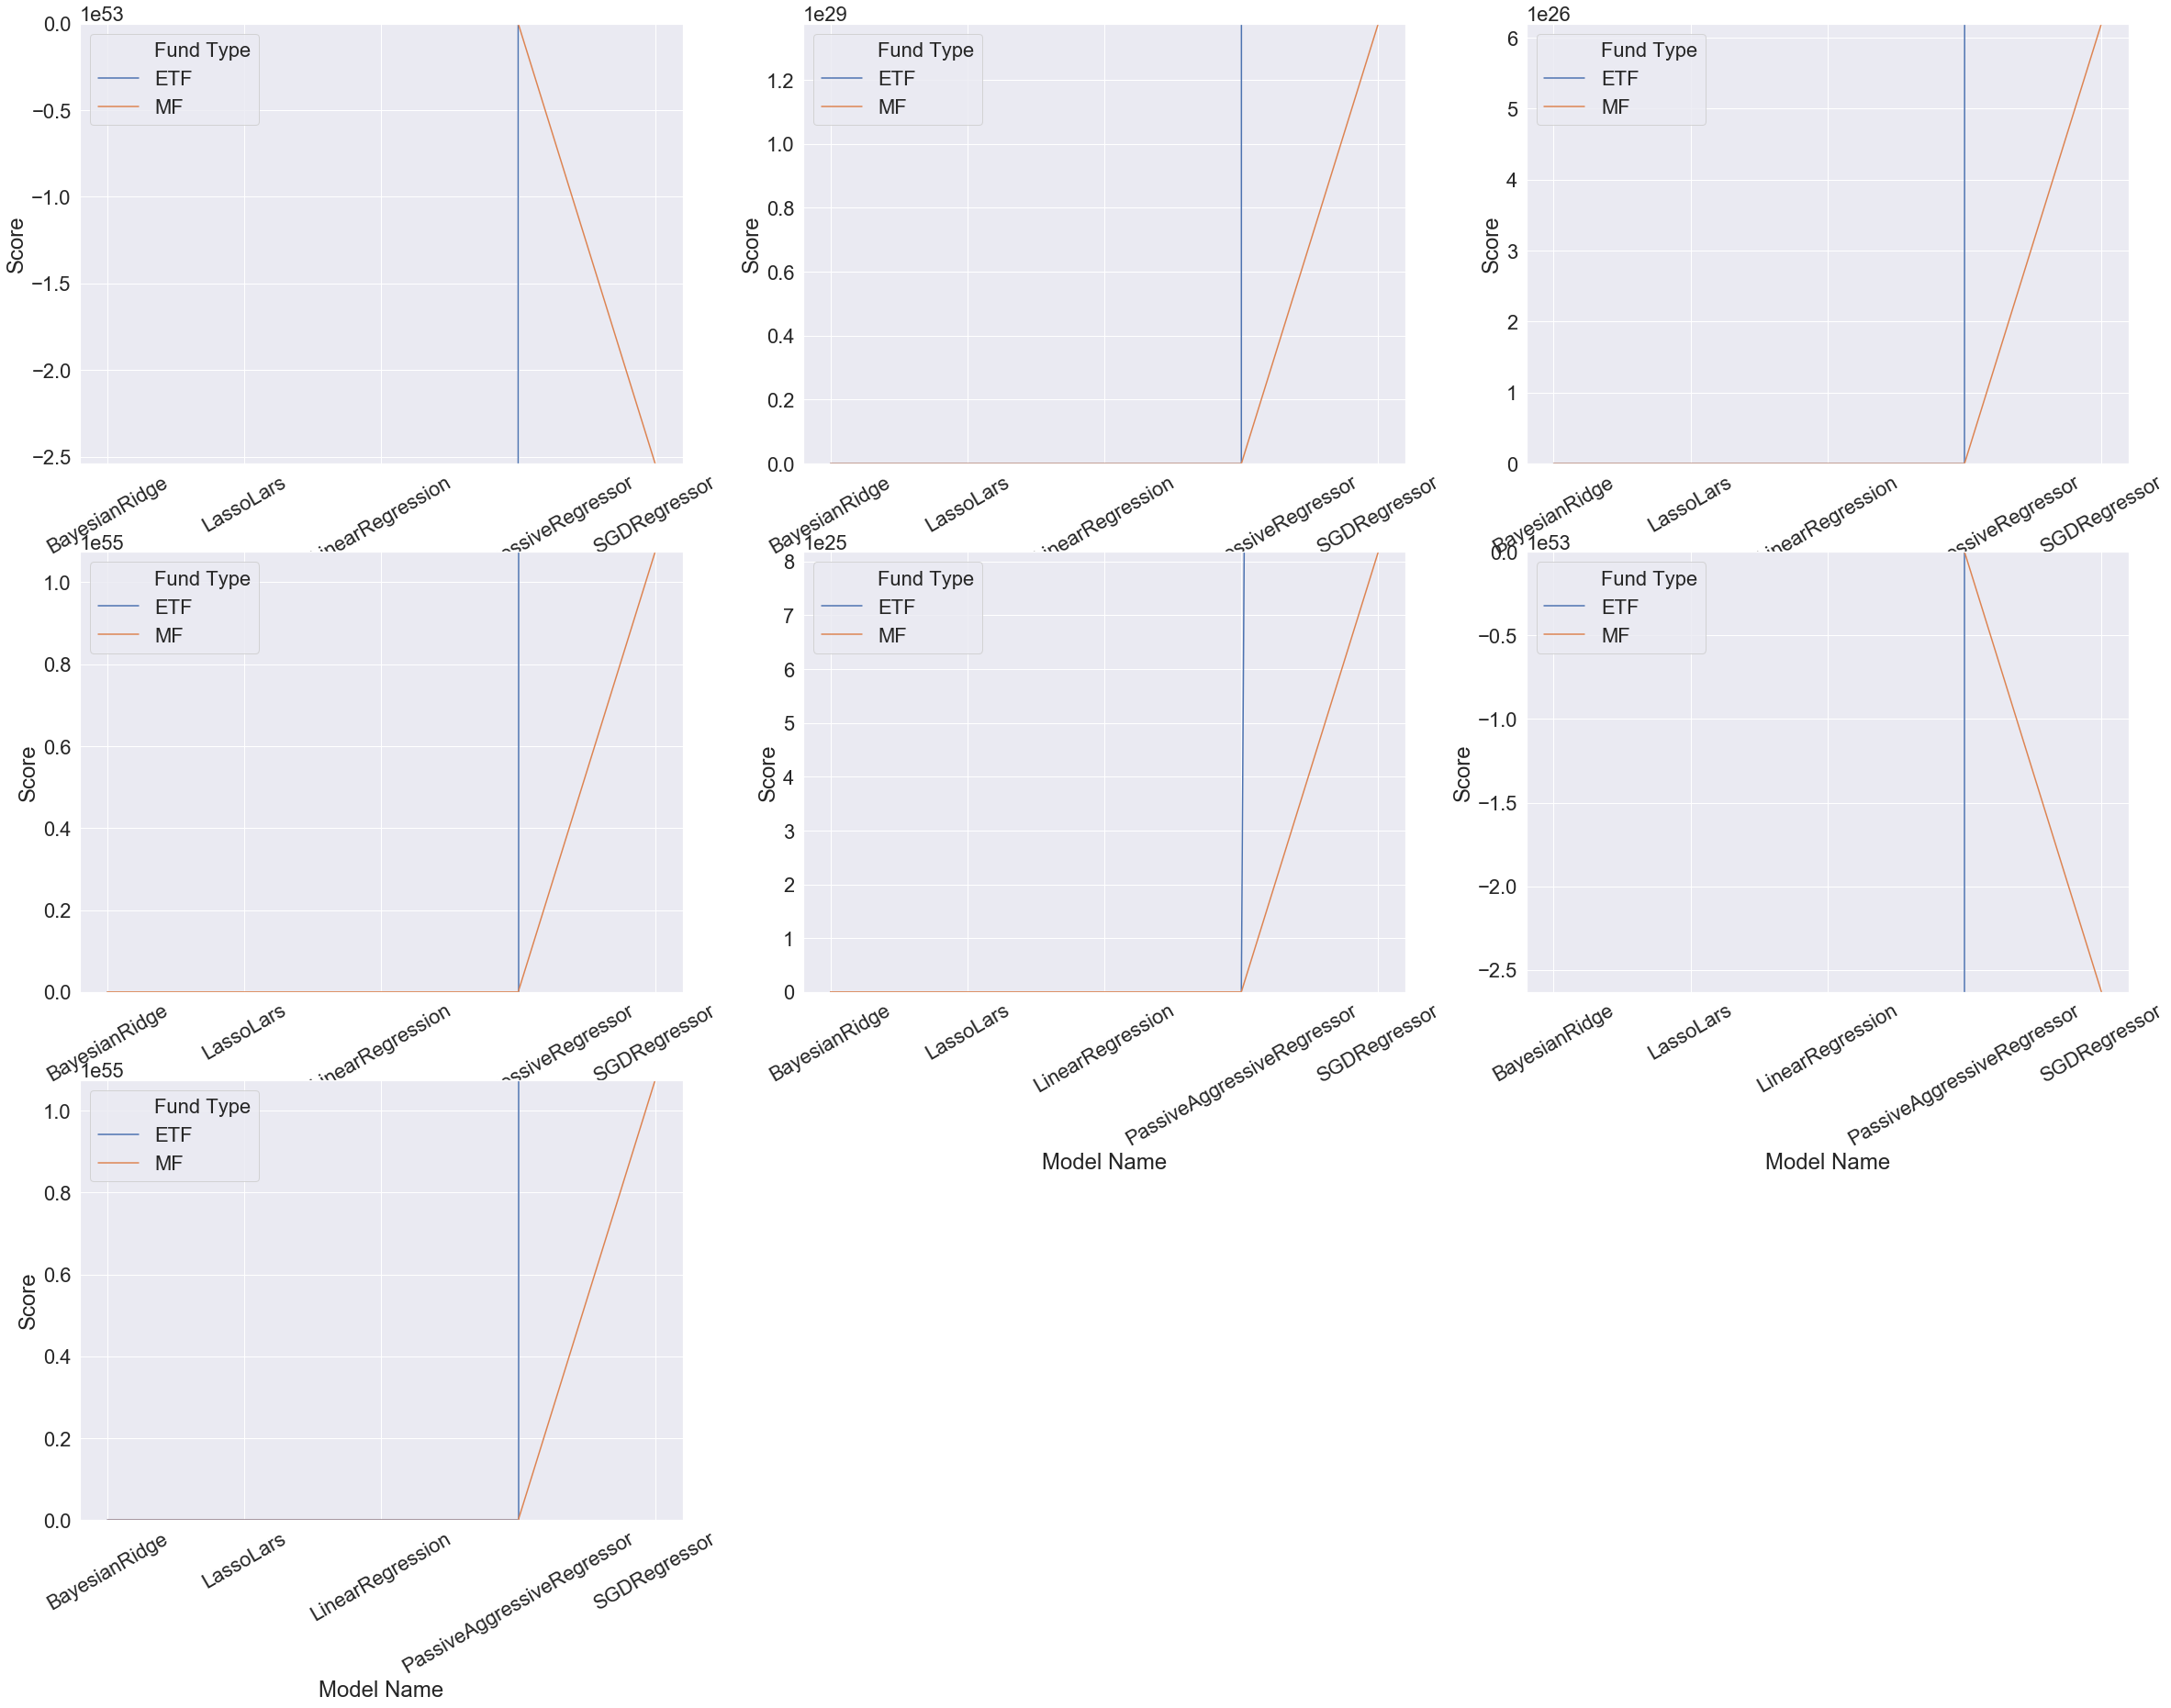

In [38]:
visualize_results(res)